# CASE STUDY ON SUNSHINE HOTELS AND RESORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings_warn=ignore_warn
from scipy import stats
from scipy.stats import norm,skew
from subprocess import check_output

## Importing the Dataset

In [2]:
df=pd.read_csv('sunshine_hotels_data.csv')

In [3]:
df

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,"4,000",Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,1,3,1,"3,500",Travel Management Company,Cognizant,Sales Portfolio 1,January,2020
2,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"4,500",Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019
3,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"7,000",Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019
4,Westside Comfort Hotel,Ghaziabad,Business,2,1,1,"7,500",Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
39856,Sander's Essentials,Hyderabad,Business,1,3,5,"12,000",Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,December,2019
39857,The Southern Comfort,Kochi,Business,2,3,5,"13,750",Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,June,2019
39858,Deccan Comfort,Bengaluru,Business,2,3,803,"36,54,453",Corporate,Juniper Networks,Sales Portfolio 1,July,2022
39859,Essentials Chandigarh,Chandigarh,Business,1,1,23,"41,85,621",Social,FIT,Support Portfolio 1,November,2019


## Step 1

### Data Consistency Check (Integrity of columns, Null Values etc)

In [4]:
# Check for null values: Null values are missing values in a column. 
df.isnull().sum()

hotel_name         0
city               0
hotel_type         0
hotel_category     0
zone               0
room_nights        0
room_revenue       0
business_source    0
account_name       0
sales_portfolio    0
month              0
year               0
dtype: int64

In [5]:
# Check for unique values: A unique constraint ensures that each value in a column is unique.
df.nunique()

hotel_name           81
city                 53
hotel_type            2
hotel_category        4
zone                  4
room_nights         233
room_revenue       3093
business_source       7
account_name       1034
sales_portfolio       7
month                12
year                  5
dtype: int64

In [6]:
# Uniques values for continous varialbes
for col in df.describe().columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel_category
[2 1 4 3]
__________________________________________________
zone
[3 1 2 4]
__________________________________________________
room_nights
[  1   3   4   2   5   8   6  40   7  14  10 332  11   9  21  12  25  13
  20  15  17 177  66  62  16  22  36  26  18  23  19  24  51  45  29  31
  30  34  28  27  32  42  35  68  91  37  33  54  55  44  41  49  38  39
  47  43  48  71  60 112  50  52  63 100  59  70  58  53  46  72  75  61
  97 118 152  73  80  85  84  64  65 110  77  83  76  74  57 216 120  82
  56  87  69  81 125  86 144  90 105  92 109  99 104 106 149 167  98  79
 154 133 127  89 121  88 132 128 211 220 117 202 284 290 487 131 266 113
 150 198 170  96 283 155 259  94 251 252 213 135 126 361 181 102 168 172
 140 107 254 179 322 263 281 228 318 115 288 207 157 108 137 147 300 163
 206 224 200 336 187 205 320 310 239 463 130 164 264 363 505 256 240 287
 297 225 227 338 103 304 280 180 194 305 242 309 374 219 186 325 468 328
 139 230 586 668 223 129 956 334 268 564 43

In [7]:
# Uniques values for object varialbes
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel_name
['South Star Comfort Inn' 'Kalyan Essentials' 'Grand Hotel Bengaluru '
 'Westside Comfort Hotel' 'Deccan Comfort' 'Pure Comfort Hotel'
 'Frontier Comfort' 'Bristol Premium' 'Leisure Comfort'
 "Tanny's Comfort Hotel" 'Airport Comfort' 'The Southern Comfort'
 'Comfort Gurgaon' 'Riverside Comfort Hotel' 'Royal Comfort'
 'Saira Fort  Comfort' "Raille's Inn Essentials" 'Grand of The East'
 'Classic Cradle Comfort' 'Hotel Business Comfort' 'Premium Suites'
 'LeMoi Premium' 'Jim Comfort' "Sander's Essentials" "Sander's Comfort"
 'Chariot Comfort' 'Grand Essentials' 'Essentials Chandigarh'
 'Maine Premium' 'Nirwana Essentials' 'Natural Essentials'
 'Rajputana Comfort Jaipur' 'Premium Zirakpur' 'Grand Goregaon Mumbai'
 'Grand Hitec City' 'Hill High Comfort' ' Premium Jaipur'
 'The Royal Plaza' 'Louise Comfort Hotel' 'Krishna Comfort Hotel'
 'City Heart Comfort' 'Premium Ludhiana' 'Comfort Jalandhar'
 'Hotel Om Premium' 'Annessi Comfort' 'Diamond Premium'
 'Comfort Residence and Tower

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       39861 non-null  object
 1   city             39861 non-null  object
 2   hotel_type       39861 non-null  object
 3   hotel_category   39861 non-null  int64 
 4   zone             39861 non-null  int64 
 5   room_nights      39861 non-null  int64 
 6   room_revenue     39861 non-null  object
 7   business_source  39861 non-null  object
 8   account_name     39861 non-null  object
 9   sales_portfolio  39861 non-null  object
 10  month            39861 non-null  object
 11  year             39861 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.6+ MB


In [9]:
# check for consistency between columns
valid_values = (df['hotel_type'] == df['hotel_type'])
valid_df = df[valid_values]
print(valid_df)

                   hotel_name        city hotel_type  hotel_category  zone  \
0      South Star Comfort Inn   Bengaluru   Business               2     3   
1           Kalyan Essentials     Chennai   Business               1     3   
2      Grand Hotel Bengaluru    Bengaluru   Business               4     3   
3      Grand Hotel Bengaluru    Bengaluru   Business               4     3   
4      Westside Comfort Hotel   Ghaziabad   Business               2     1   
...                       ...         ...        ...             ...   ...   
39856     Sander's Essentials   Hyderabad   Business               1     3   
39857    The Southern Comfort       Kochi   Business               2     3   
39858          Deccan Comfort   Bengaluru   Business               2     3   
39859   Essentials Chandigarh  Chandigarh   Business               1     1   
39860       Premium Hotel Goa         Goa    Leisure               3     4   

       room_nights room_revenue            business_source  \
0

In [10]:
# check for constraints on column 'Year'
valid_values = (df['year'] >= 2018) & (df['year'] <= 2022)
valid_df = df[valid_values]
valid_df


,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,"4,000",Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,1,3,1,"3,500",Travel Management Company,Cognizant,Sales Portfolio 1,January,2020
2,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"4,500",Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019
3,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,"7,000",Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019
4,Westside Comfort Hotel,Ghaziabad,Business,2,1,1,"7,500",Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
39856,Sander's Essentials,Hyderabad,Business,1,3,5,"12,000",Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,December,2019
39857,The Southern Comfort,Kochi,Business,2,3,5,"13,750",Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,June,2019
39858,Deccan Comfort,Bengaluru,Business,2,3,803,"36,54,453",Corporate,Juniper Networks,Sales Portfolio 1,July,2022
39859,Essentials Chandigarh,Chandigarh,Business,1,1,23,"41,85,621",Social,FIT,Support Portfolio 1,November,2019


## Step 2

### Feature engineering


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       39861 non-null  object
 1   city             39861 non-null  object
 2   hotel_type       39861 non-null  object
 3   hotel_category   39861 non-null  int64 
 4   zone             39861 non-null  int64 
 5   room_nights      39861 non-null  int64 
 6   room_revenue     39861 non-null  object
 7   business_source  39861 non-null  object
 8   account_name     39861 non-null  object
 9   sales_portfolio  39861 non-null  object
 10  month            39861 non-null  object
 11  year             39861 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.6+ MB


In [12]:
df.describe(include='all')

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
count,39861,39861,39861,39861.000000,39861.000000,39861.000000,39861,39861,39861,39861,39861,39861.000000
unique,81,53,2,NaN,NaN,NaN,3093,7,1034,7,12,NaN
top,Premium Suites,Bengaluru,Business,NaN,NaN,NaN,"3,000",Corporate,Humming Bird Digital Pvt Ltd,Sales Portfolio 1,February,NaN
freq,2832,9227,35702,NaN,NaN,NaN,1529,18753,5994,21135,4196,NaN
mean,NaN,NaN,NaN,2.135822,2.329043,5.363890,NaN,NaN,NaN,NaN,NaN,2019.744261
std,NaN,NaN,NaN,0.841812,1.091709,21.709763,NaN,NaN,NaN,NaN,NaN,1.492808
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2018.000000
25%,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2018.000000
50%,NaN,NaN,NaN,2.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2019.000000
75%,NaN,NaN,NaN,3.000000,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,2021.000000


In [13]:
# Converting the Room_revenue object to int Datatype
df['room_revenue'] = df['room_revenue'].apply(lambda x: int(x.replace(',','')) if x != ' -   ' else None)


In [14]:
df['room_revenue']=df['room_revenue'].fillna(0).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       39861 non-null  object
 1   city             39861 non-null  object
 2   hotel_type       39861 non-null  object
 3   hotel_category   39861 non-null  int64 
 4   zone             39861 non-null  int64 
 5   room_nights      39861 non-null  int64 
 6   room_revenue     39861 non-null  int32 
 7   business_source  39861 non-null  object
 8   account_name     39861 non-null  object
 9   sales_portfolio  39861 non-null  object
 10  month            39861 non-null  object
 11  year             39861 non-null  int64 
dtypes: int32(1), int64(4), object(7)
memory usage: 3.5+ MB


In [16]:
# Now We have to add RPD and RevPD columns wrt to room_night and room_revenue

# Calculate the RPD value for each row
df['RPD'] = df['room_nights'] / df['year'].apply(lambda x: 212 if x == 2022 else 365)

# df.drop('num_days', axis=1,inplace=True)

In [17]:
# Calculate the RevPD value for each row
df['RevPD'] = df['room_revenue'] / df['year'].apply(lambda x: 212 if x == 2022 else 365)

In [18]:
df

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RPD,RevPD
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,0.004717,18.867925
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,0.002740,9.589041
2,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019,0.002740,12.328767
3,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019,0.002740,19.178082
4,Westside Comfort Hotel,Ghaziabad,Business,2,1,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018,0.002740,20.547945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39856,Sander's Essentials,Hyderabad,Business,1,3,5,12000,Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,December,2019,0.013699,32.876712
39857,The Southern Comfort,Kochi,Business,2,3,5,13750,Corporate,Zydus Healthcare Ltd,Sales Portfolio 3,June,2019,0.013699,37.671233
39858,Deccan Comfort,Bengaluru,Business,2,3,803,3654453,Corporate,Juniper Networks,Sales Portfolio 1,July,2022,3.787736,17237.985849
39859,Essentials Chandigarh,Chandigarh,Business,1,1,23,4185621,Social,FIT,Support Portfolio 1,November,2019,0.063014,11467.454795


## Step 3

### Higher order overview of data - .describe and .info


In [19]:
df.describe(include='all')

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RPD,RevPD
count,39861,39861,39861,39861.000000,39861.000000,39861.000000,3.986100e+04,39861,39861,39861,39861,39861.000000,39861.000000,39861.000000
unique,81,53,2,NaN,NaN,NaN,NaN,7,1034,7,12,NaN,NaN,NaN
top,Premium Suites,Bengaluru,Business,NaN,NaN,NaN,NaN,Corporate,Humming Bird Digital Pvt Ltd,Sales Portfolio 1,February,NaN,NaN,NaN
freq,2832,9227,35702,NaN,NaN,NaN,NaN,18753,5994,21135,4196,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.135822,2.329043,5.363890,2.062614e+04,NaN,NaN,NaN,NaN,2019.744261,0.017071,65.941626
std,NaN,NaN,NaN,0.841812,1.091709,21.709763,8.275256e+04,NaN,NaN,NaN,NaN,1.492808,0.072336,278.050512
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,2018.000000,0.002740,0.000000
25%,NaN,NaN,NaN,2.000000,1.000000,1.000000,4.000000e+03,NaN,NaN,NaN,NaN,2018.000000,0.002740,12.602740
50%,NaN,NaN,NaN,2.000000,3.000000,2.000000,7.600000e+03,NaN,NaN,NaN,NaN,2019.000000,0.005479,23.013699
75%,NaN,NaN,NaN,3.000000,3.000000,4.000000,1.600000e+04,NaN,NaN,NaN,NaN,2021.000000,0.013699,49.528302


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       39861 non-null  object 
 1   city             39861 non-null  object 
 2   hotel_type       39861 non-null  object 
 3   hotel_category   39861 non-null  int64  
 4   zone             39861 non-null  int64  
 5   room_nights      39861 non-null  int64  
 6   room_revenue     39861 non-null  int32  
 7   business_source  39861 non-null  object 
 8   account_name     39861 non-null  object 
 9   sales_portfolio  39861 non-null  object 
 10  month            39861 non-null  object 
 11  year             39861 non-null  int64  
 12  RPD              39861 non-null  float64
 13  RevPD            39861 non-null  float64
dtypes: float64(2), int32(1), int64(4), object(7)
memory usage: 4.1+ MB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.986100e+04
mean     2.062614e+04
std      8.275256e+04
min      0.000000e+00
25%      4.000000e+03
50%      7.600000e+03
75%      1.600000e+04
max      4.800000e+06
Name: room_revenue, dtype: float64

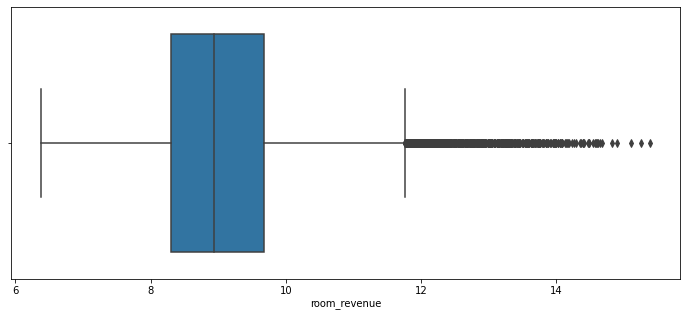

In [21]:
# Create the boxplot for 'room_revenue' to see outliers
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
sns.boxplot(x=np.log(df["room_revenue"]))
df['room_revenue'].describe()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    3.986100e+04
mean     2.062614e+04
std      8.275256e+04
min      0.000000e+00
25%      4.000000e+03
50%      7.600000e+03
75%      1.600000e+04
max      4.800000e+06
Name: room_revenue, dtype: float64

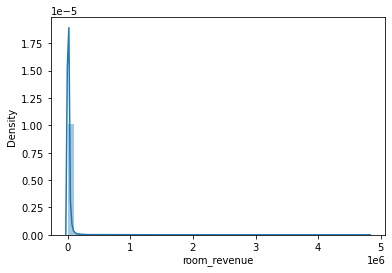

In [22]:
# continuous data to show the extent of data skewness 
sns.distplot(df['room_revenue'],kde=True)

# describe only column 'room_nights'
df['room_revenue'].describe()

In [23]:
# Create the outliear for 'Dataset'
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #Finding the Inter Quartile Range
print(IQR)

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = df[(df < Lower_bound) | (df > Upper_bound)]


outliers

hotel_category        1.000000
zone                  2.000000
room_nights           3.000000
room_revenue      12000.000000
year                  3.000000
RPD                   0.010959
RevPD                36.925562
dtype: float64


C:\Users\GAURAN~1\AppData\Local\Temp/ipykernel_15260/1274960027.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < Lower_bound) | (df > Upper_bound)]


,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RPD,RevPD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39858,NaN,NaN,NaN,NaN,NaN,803.0,3654453.0,NaN,NaN,NaN,NaN,NaN,3.787736,17237.985849
39859,NaN,NaN,NaN,NaN,NaN,23.0,4185621.0,NaN,NaN,NaN,NaN,NaN,0.063014,11467.454795


In [24]:
# # Calculate the range, variance, and standard deviation
Room_rev= df['room_revenue']

Room_rev_range =np.max(Room_rev) - np.min(Room_rev)
Room_rev_variance = np.var(Room_rev)
Room_rev_std_deviation = np.std(Room_rev)

print("Range:", Room_rev_range)
print("Variance:", Room_rev_variance)
print("Standard deviation:", Room_rev_std_deviation)
print('Skewness:',df['room_revenue'].skew())
df['room_revenue'].describe()

Range: 4800000
Variance: 6847813662.498109
Standard deviation: 82751.5175842601
Skewness: 22.37564065858935


count    3.986100e+04
mean     2.062614e+04
std      8.275256e+04
min      0.000000e+00
25%      4.000000e+03
50%      7.600000e+03
75%      1.600000e+04
max      4.800000e+06
Name: room_revenue, dtype: float64

### Identifying Outliers with Visualization

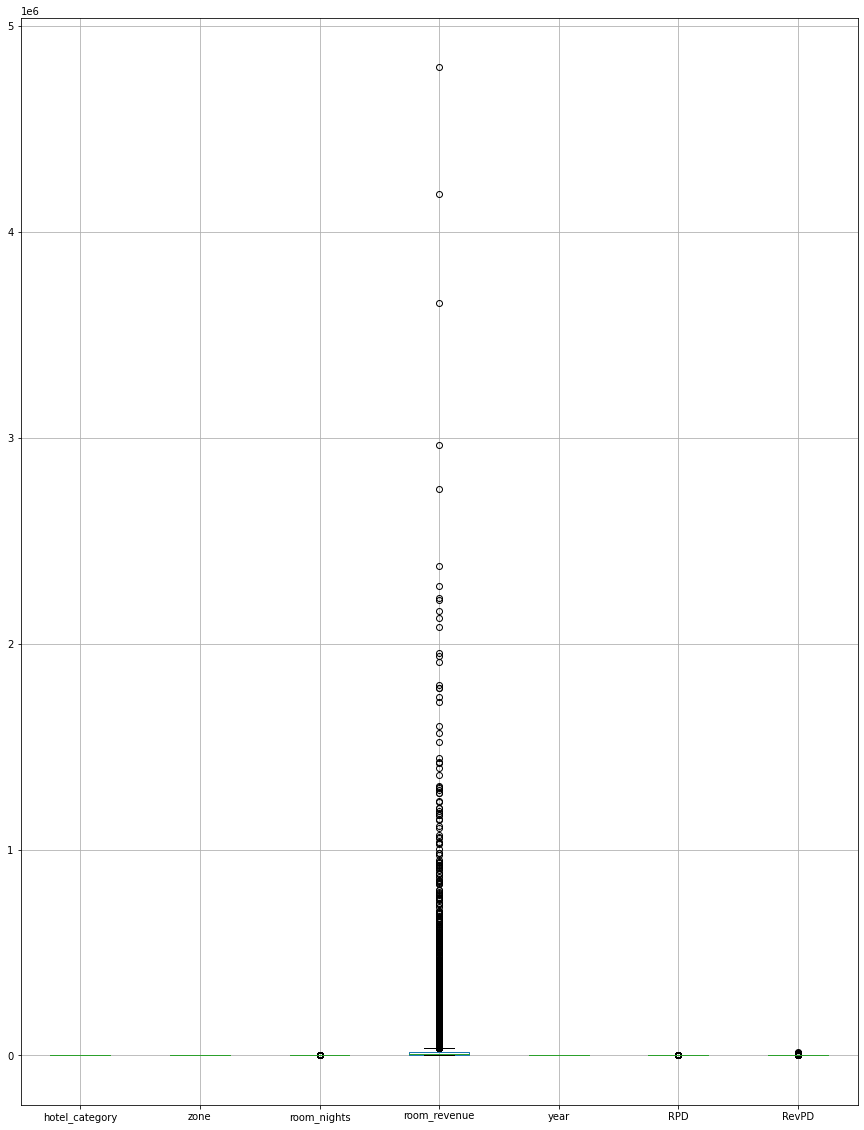

In [25]:
# Create the Box Plot
fig, ax = plt.subplots(figsize=(15, 20))
df.boxplot(ax=ax)
plt.show()

From the box plot room_revenue is showing more outliers in where range is 48,00,000 its mean is 20,620 
count    3.986100e+04
mean     2.062614e+04
std      8.275256e+04
min      0.000000e+00
25%      4.000000e+03
50%      7.600000e+03
75%      1.600000e+04
max      4.800000e+06

<AxesSubplot:xlabel='year', ylabel='room_revenue'>

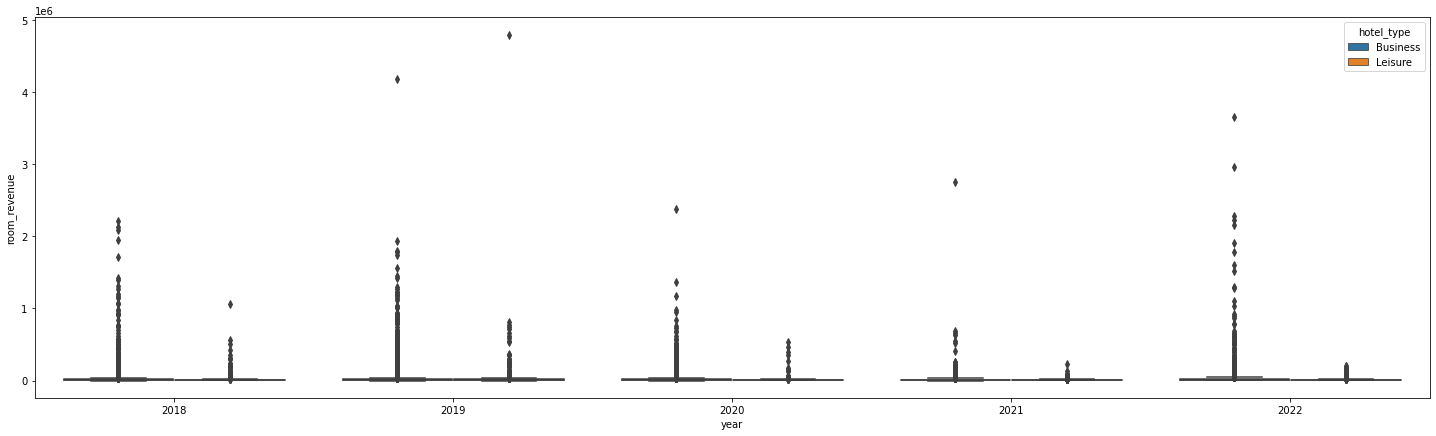

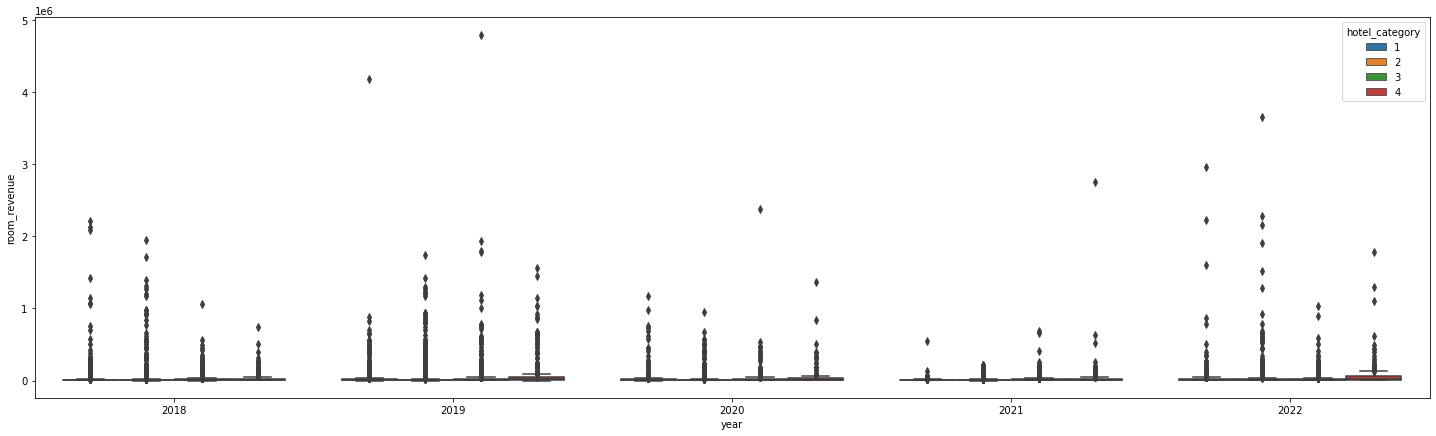

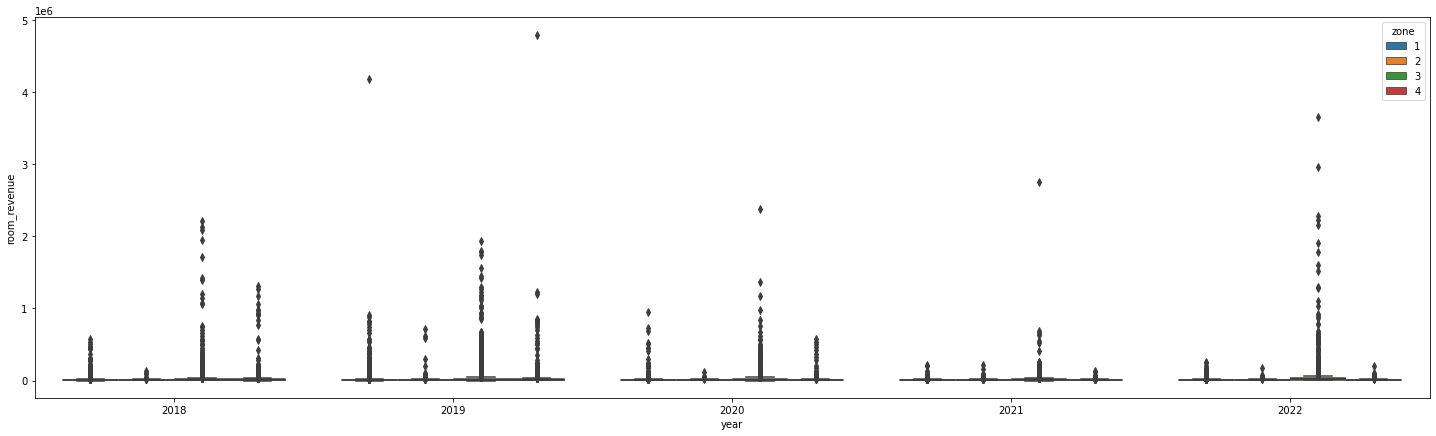

In [26]:
# Finding the Outlier on bases of hotel_type, hotel_category,zone, Year
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25,7))
sns.boxplot(data=df, x="year", y="room_revenue", hue="hotel_type")  # wrt to Hotel Type

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25,7))
sns.boxplot(data=df, x="year", y="room_revenue", hue="hotel_category")  # wrt to Hotel Category

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25,7))
sns.boxplot(data=df, x="year", y="room_revenue", hue="zone")        # Wrt to zone
# df.boxplot(column='room_revenue' , by='hotel_type')

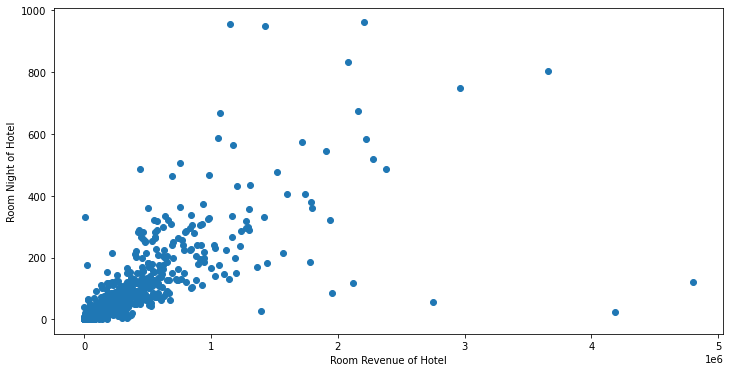

In [27]:
# Create the Scatter plot
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['room_revenue'], df['room_nights'])
ax.set_xlabel('Room Revenue of Hotel')
ax.set_ylabel('Room Night of Hotel')
plt.show()

### Quantile-based Flooring and Capping

In [28]:
# Quantile-based Flooring and Capping
print(df['room_revenue'].quantile(0.10))
print(df['room_revenue'].quantile(0.90))


3000.0
36400.0


In [29]:

df["room_revenue"] = np.where(df["room_revenue"] <3000.0, 3000.0,df['room_revenue'])
df["room_revenue"] = np.where(df["room_revenue"] >36400.0, 36400.0,df['room_revenue'])
print(df['room_revenue'].skew())

1.279472194645945


### IQR Score

In [30]:
# Finding the IQR Score
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(33948, 14)


C:\Users\GAURAN~1\AppData\Local\Temp/ipykernel_15260/3468169901.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


### Log Transformation


In [31]:
df["Log_room_revenue"] = df["room_revenue"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['Log_room_revenue'].skew())
print(df['Log_room_revenue'].skew())

0.3975168902630307
0.3975168902630307


### Replacing Outliers with Median Values

In [32]:
print(df['room_revenue'].quantile(0.50)) 
print(df['room_revenue'].quantile(0.95)) 
df['room_revenue'] = np.where(df['room_revenue'] > 36400.0, 7600.0, df['room_revenue'])
df.describe()

7600.0
36400.0


,hotel_category,zone,room_nights,room_revenue,year,RPD,RevPD,Log_room_revenue
count,39861.000000,39861.000000,39861.000000,39861.000000,39861.000000,39861.000000,39861.000000,39861.000000
mean,2.135822,2.329043,5.363890,12150.164145,2019.744261,0.017071,65.941626,9.052435
std,0.841812,1.091709,21.709763,10798.131890,1.492808,0.072336,278.050512,0.824987
min,1.000000,1.000000,1.000000,3000.000000,2018.000000,0.002740,0.000000,8.006368
25%,2.000000,1.000000,1.000000,4000.000000,2018.000000,0.002740,12.602740,8.294050
50%,2.000000,3.000000,2.000000,7600.000000,2019.000000,0.005479,23.013699,8.935904
75%,3.000000,3.000000,4.000000,16000.000000,2021.000000,0.013699,49.528302,9.680344
max,4.000000,4.000000,961.000000,36400.000000,2022.000000,3.787736,17237.985849,10.502324


## Univariate Analysis: 


### Pie plots: Mix of different classes in each of the categorical columns based on number of transactions (Except account_name)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        39861 non-null  object 
 1   city              39861 non-null  object 
 2   hotel_type        39861 non-null  object 
 3   hotel_category    39861 non-null  int64  
 4   zone              39861 non-null  int64  
 5   room_nights       39861 non-null  int64  
 6   room_revenue      39861 non-null  float64
 7   business_source   39861 non-null  object 
 8   account_name      39861 non-null  object 
 9   sales_portfolio   39861 non-null  object 
 10  month             39861 non-null  object 
 11  year              39861 non-null  int64  
 12  RPD               39861 non-null  float64
 13  RevPD             39861 non-null  float64
 14  Log_room_revenue  39861 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 4.6+ MB


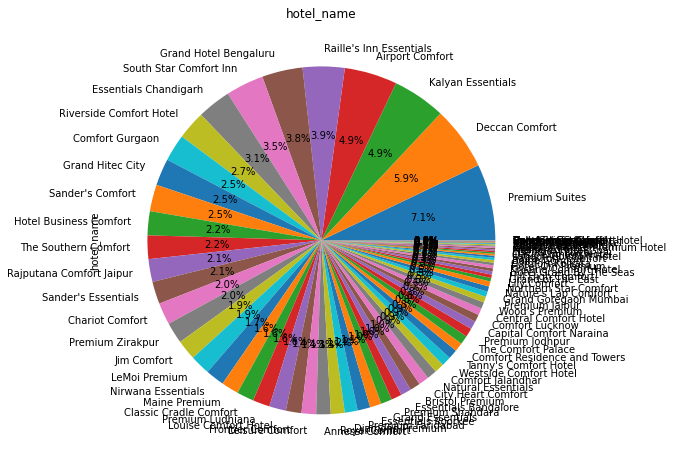

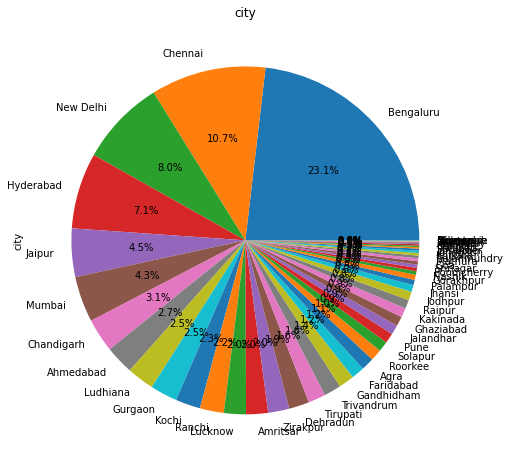

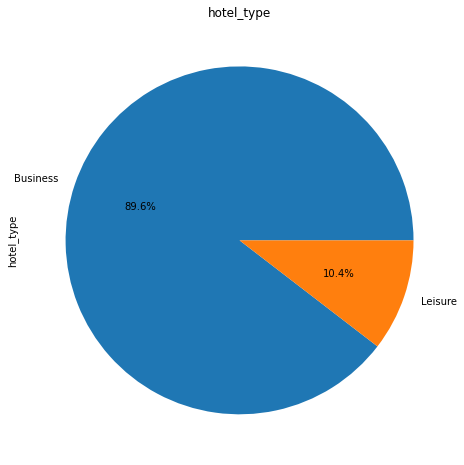

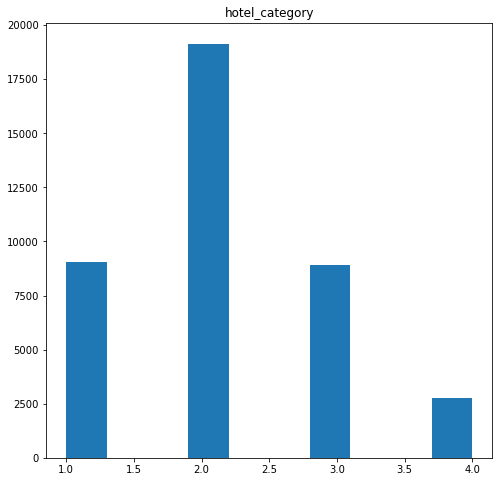

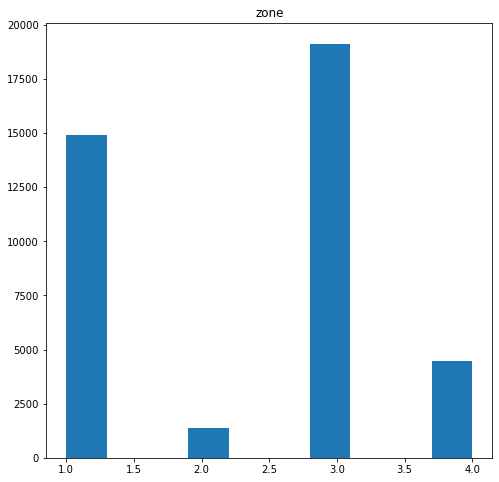

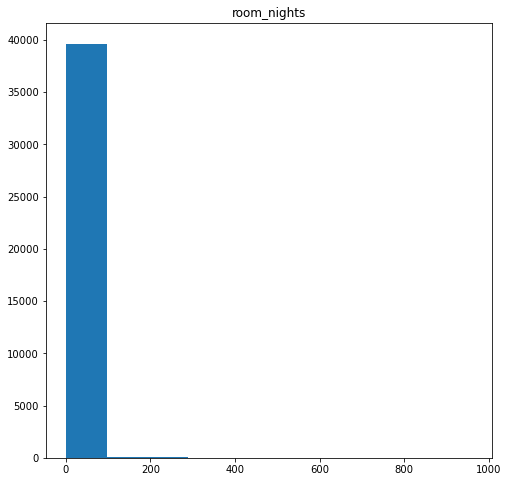

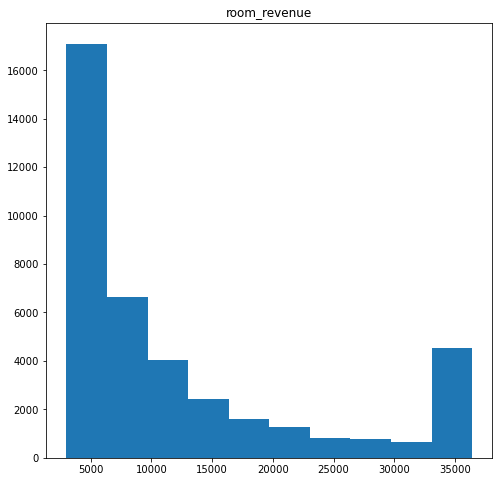

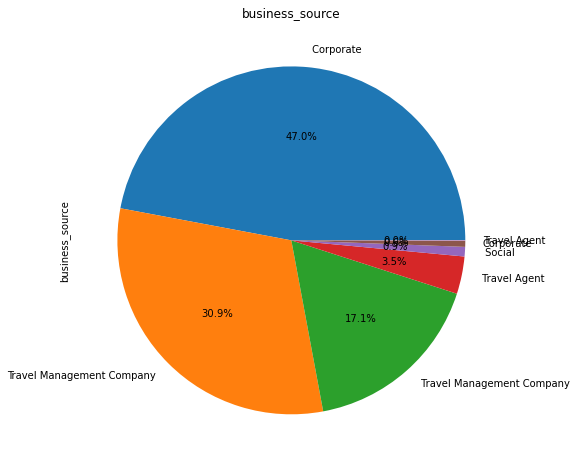

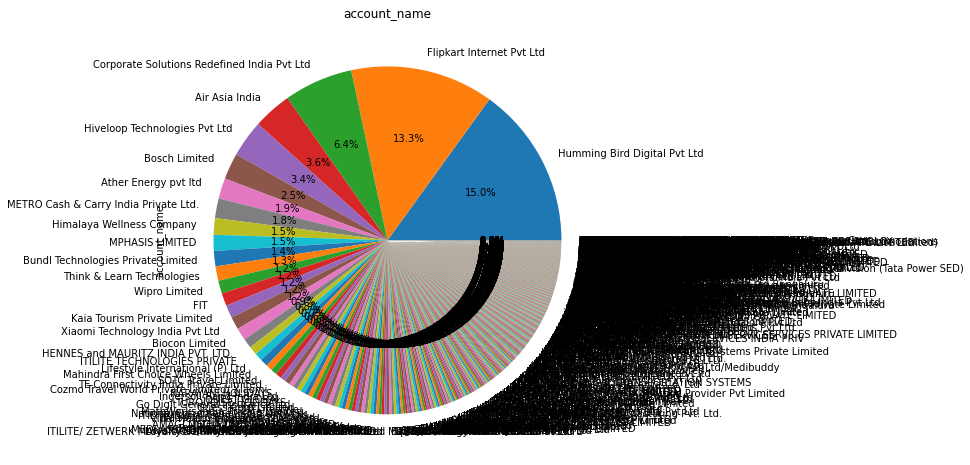

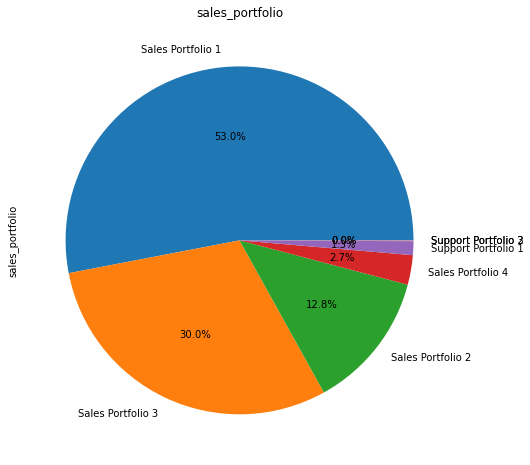

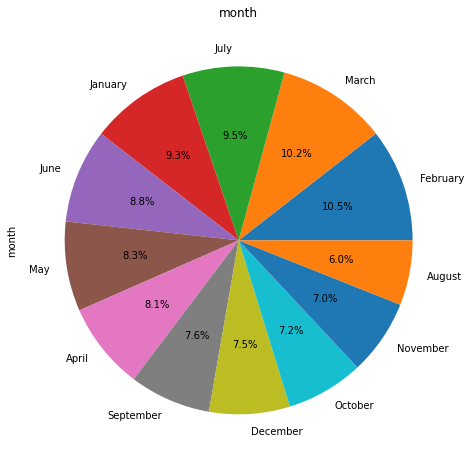

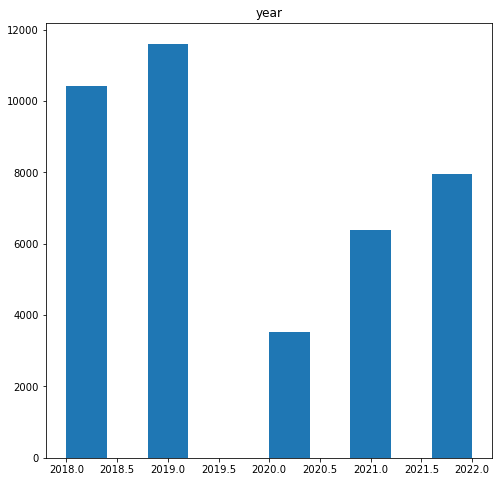

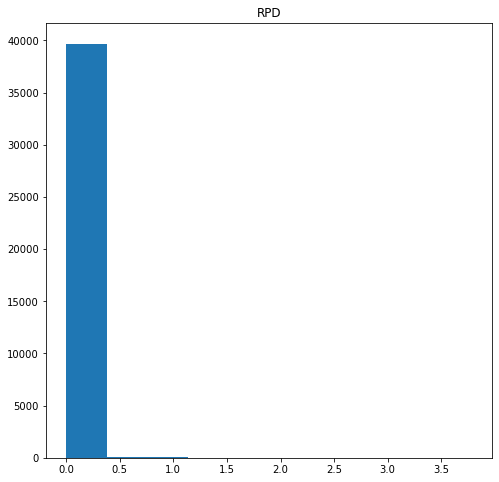

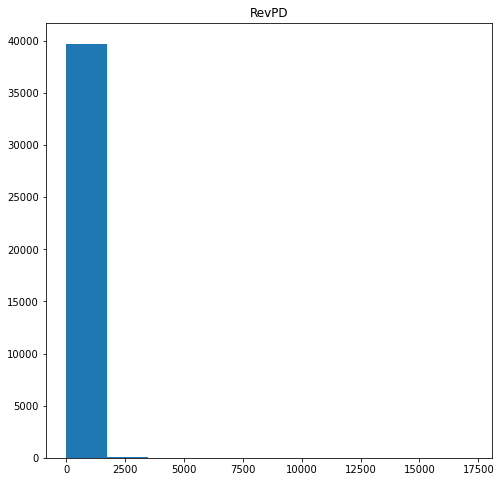

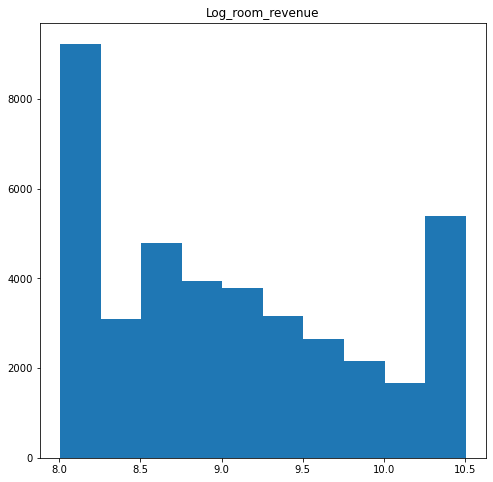

In [128]:
# Loop through the columns
columns=df.columns
for column in columns:
    # Check if the column is categorical
    if df[column].dtype == 'object':
        # Count the number of occurrences of each category
        counts = df[column].value_counts()

        # Create a pie chart of the counts
        fig, ax = plt.subplots(figsize=(8, 8))
        counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(column)
        plt.show()
    else:
        # Create a histogram of the column values
        fig, ax = plt.subplots(figsize=(8, 8))
        plt.hist(df[column])
        plt.title(column)
        plt.show()






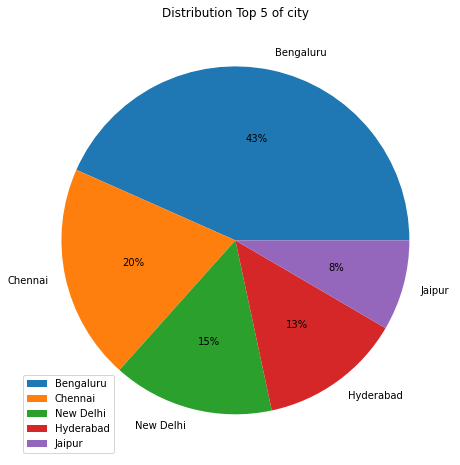

In [35]:
# create the Mix Pie Chart for 'City'
city_counts = df['city'].value_counts().to_dict()
top_cities = dict(sorted(city_counts.items(), key=lambda item: item[1], reverse=True)[:5])
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(top_cities.values(), labels=top_cities.keys(),autopct='%.0f%%')
plt.title('Distribution Top 5 of city')
plt.legend()
plt.show()

In [36]:
Top_5_city_revenue = df.groupby('city')['RevPD'].sum().sort_values(ascending=False).head(5)
Top_5_city_revenue

city
Bengaluru    1.167604e+06
Chennai      3.114233e+05
Mumbai       1.676477e+05
New Delhi    1.655597e+05
Hyderabad    1.201222e+05
Name: RevPD, dtype: float64

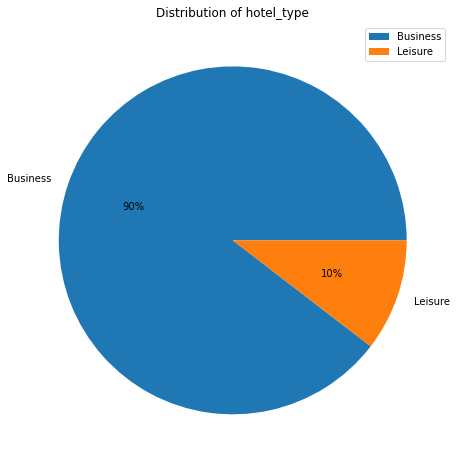

In [37]:
# create the Mix Pie Chart for 'hotel_type'
hotel_type_counts = df['hotel_type'].value_counts().to_dict()
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(hotel_type_counts.values(), labels=hotel_type_counts.keys(),autopct='%.0f%%')
plt.title('Distribution of hotel_type')
plt.legend()
plt.show()

In [38]:
Hotel_Type_revenue = df.groupby('hotel_type')['RevPD'].sum()
Hotel_Type_revenue

hotel_type
Business    2.414469e+06
Leisure     2.140307e+05
Name: RevPD, dtype: float64

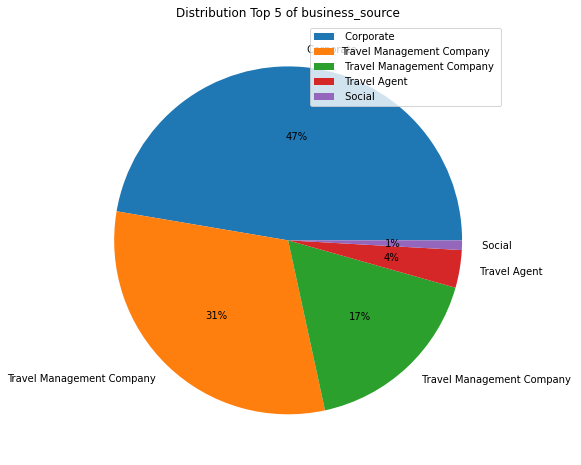

In [39]:
# create the Mix Pie Chart for 'business_source'
business_source_counts = df['business_source'].value_counts().to_dict()
top_business_source = dict(sorted(business_source_counts.items(), key=lambda item: item[1], reverse=True)[:5])
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(top_business_source.values(), labels=top_business_source.keys(),autopct='%.0f%%')
plt.title('Distribution Top 5 of business_source')
plt.legend()
plt.show()

In [40]:
business_source_revenue = df.groupby('business_source')['RevPD'].sum().sort_values(ascending=False)
business_source_revenue

business_source
 Corporate                     1.807446e+06
 Travel Management Company     3.973219e+05
 Travel Agent                  2.381675e+05
Travel Management Company      1.447752e+05
 Social                        3.768976e+04
Corporate                      2.875290e+03
Travel Agent                   2.231591e+02
Name: RevPD, dtype: float64

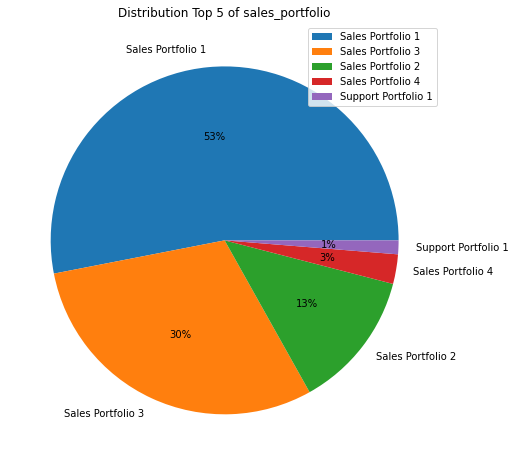

In [41]:
# create the Mix Pie Chart for 'sales_portfolio'
sales_portfolio_counts = df['sales_portfolio'].value_counts().to_dict()
top_sales_portfolio = dict(sorted(sales_portfolio_counts.items(), key=lambda item: item[1], reverse=True)[:5])
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(top_sales_portfolio.values(), labels=top_sales_portfolio.keys(),autopct='%.0f%%')
plt.title('Distribution Top 5 of sales_portfolio')
plt.legend()
plt.show()

In [42]:
sales_portfolio_revenue = df.groupby('sales_portfolio')['RevPD'].sum().sort_values(ascending=False).head(5)
sales_portfolio_revenue

sales_portfolio
Sales Portfolio 1      1.580029e+06
Sales Portfolio 3      6.120575e+05
Sales Portfolio 2      3.446940e+05
Sales Portfolio 4      5.360593e+04
Support Portfolio 1    3.450518e+04
Name: RevPD, dtype: float64

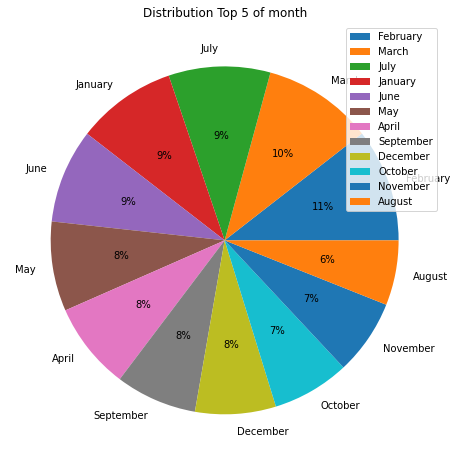

In [43]:
# create the Mix Pie Chart for 'month'
month_counts = df['month'].value_counts().to_dict()
top_month = dict(sorted(month_counts.items(), key=lambda item: item[1], reverse=True)[:])
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(top_month.values(), labels=top_month.keys(),autopct='%.0f%%')
plt.title('Distribution Top 5 of month')
plt.legend()
plt.show()

In [44]:
month_revenue = df.groupby('month')['RevPD'].sum().sort_values(ascending=False).head(5)
month_revenue

month
July     324231.157327
April    314965.590980
March    284063.873520
May      283914.673391
June     270825.688020
Name: RevPD, dtype: float64

### Pie plots: Mix of RPD and REVPD shares of different classes in each of the categorical columns based on total value 

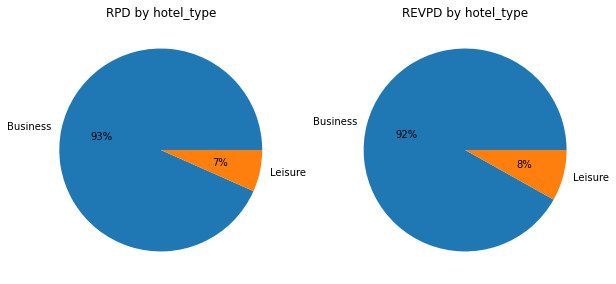

In [45]:
# calculate total RPD and REVPD by category for 'Hotel_type'
rpd_by_cat = df.groupby('hotel_type')['RPD'].sum().sort_values(ascending=False)
revpd_by_cat = df.groupby('hotel_type')['RevPD'].sum().sort_values(ascending=False)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by hotel_type')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by hotel_type')
plt.show()

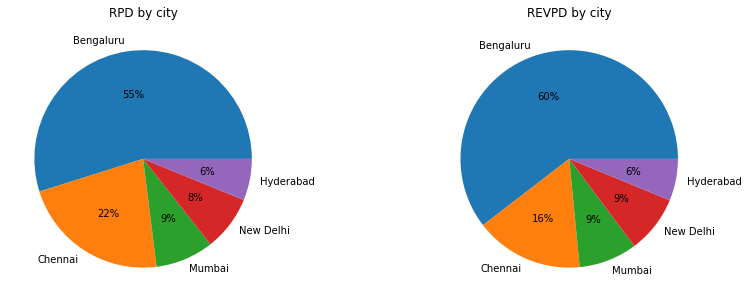

In [131]:
# calculate total RPD and REVPD by category for 'city'
rpd_by_cat = df.groupby('city')['RPD'].sum().sort_values(ascending=False).head(5)
revpd_by_cat = df.groupby('city')['RevPD'].sum().sort_values(ascending=False).head(5)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by city')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by city')
plt.show()

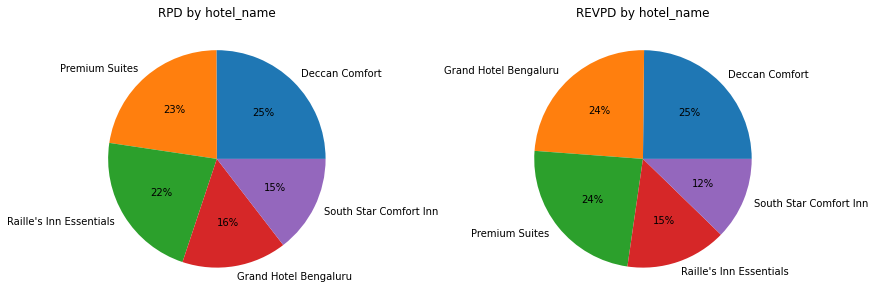

In [130]:
# calculate total RPD and REVPD by category for 'hotel_name'
rpd_by_cat = df.groupby('hotel_name')['RPD'].sum().sort_values(ascending=False).head(5)
revpd_by_cat = df.groupby('hotel_name')['RevPD'].sum().sort_values(ascending=False).head(5)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by hotel_name')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by hotel_name')
plt.show()

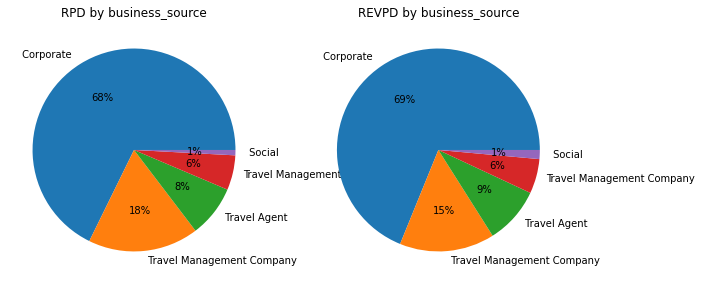

In [48]:
# calculate total RPD and REVPD by category for 'business_source '
rpd_by_cat = df.groupby('business_source')['RPD'].sum().sort_values(ascending=False).head(5)
revpd_by_cat = df.groupby('business_source')['RevPD'].sum().sort_values(ascending=False).head(5)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by business_source')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by business_source')
plt.show()

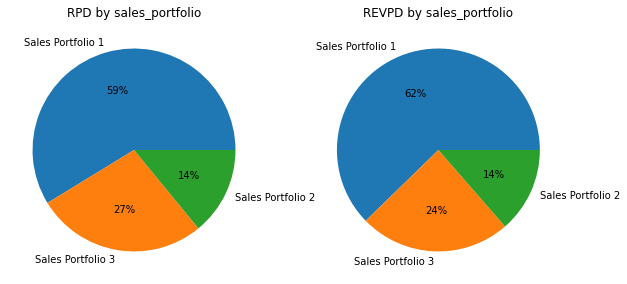

In [49]:
# calculate total RPD and REVPD by category for 'sales_portfolio '
rpd_by_cat = df.groupby('sales_portfolio')['RPD'].sum().sort_values(ascending=False).head(3)
revpd_by_cat = df.groupby('sales_portfolio')['RevPD'].sum().sort_values(ascending=False).head(3)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by sales_portfolio')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by sales_portfolio')
plt.show()

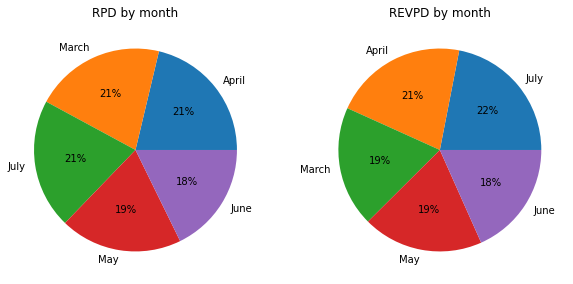

In [50]:
# calculate total RPD and REVPD by category for 'month '
rpd_by_cat = df.groupby('month')['RPD'].sum().sort_values(ascending=False).head(5)
revpd_by_cat = df.groupby('month')['RevPD'].sum().sort_values(ascending=False).head(5)

# create pie charts for RPD and REVPD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(rpd_by_cat.values, labels=rpd_by_cat.index,autopct='%.0f%%')
ax1.set_title('RPD by month')

ax2.pie(revpd_by_cat.values, labels=revpd_by_cat.index,autopct='%.0f%%')
ax2.set_title('REVPD by month')
plt.show()

### Boxplots for continuous variable

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        39861 non-null  object 
 1   city              39861 non-null  object 
 2   hotel_type        39861 non-null  object 
 3   hotel_category    39861 non-null  int64  
 4   zone              39861 non-null  int64  
 5   room_nights       39861 non-null  int64  
 6   room_revenue      39861 non-null  float64
 7   business_source   39861 non-null  object 
 8   account_name      39861 non-null  object 
 9   sales_portfolio   39861 non-null  object 
 10  month             39861 non-null  object 
 11  year              39861 non-null  int64  
 12  RPD               39861 non-null  float64
 13  RevPD             39861 non-null  float64
 14  Log_room_revenue  39861 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 4.6+ MB


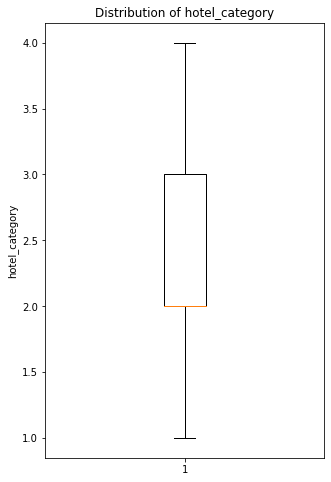

In [52]:
# create boxplot of hotel_category column
plt.figure(figsize=(5, 8))
plt.boxplot(df['hotel_category'])
plt.title('Distribution of hotel_category')
plt.ylabel('hotel_category')
plt.show()

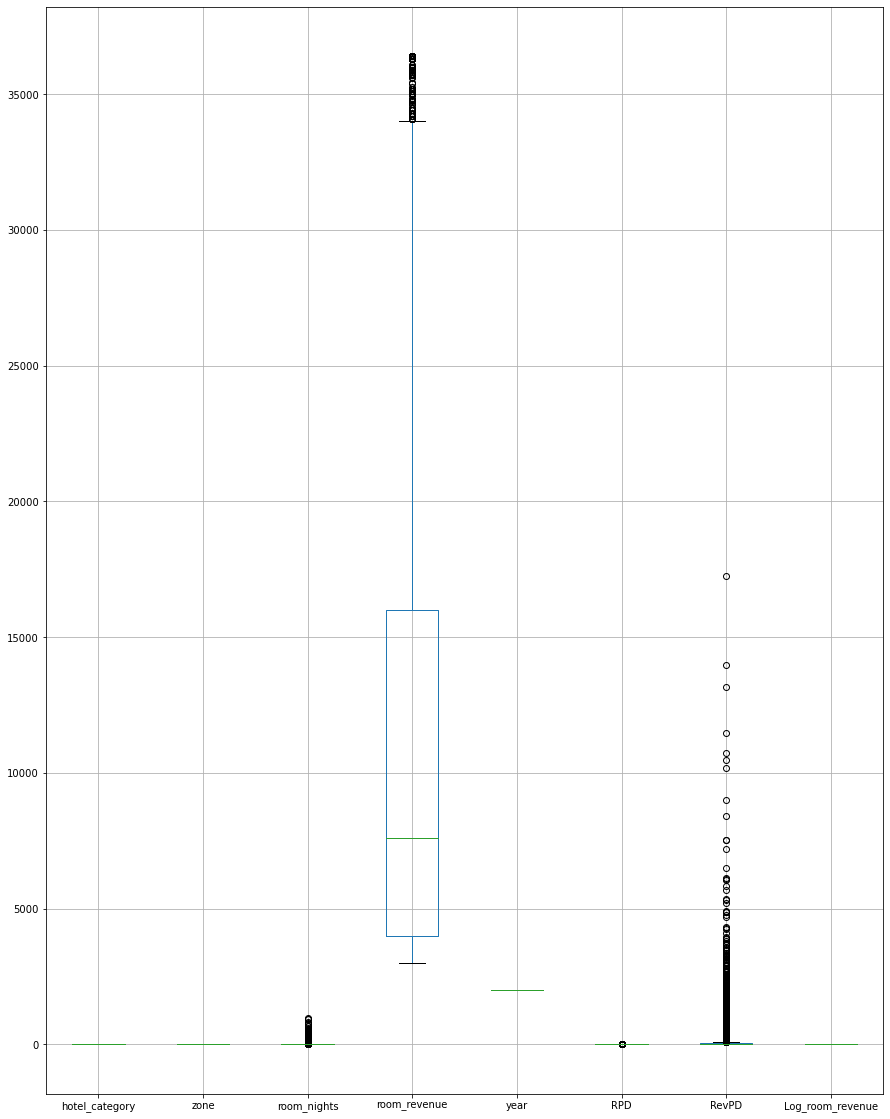

In [53]:
fig, ax = plt.subplots(figsize=(15, 20))
df.boxplot(ax=ax)
plt.show()

# Bivariate Analysis:

# RPD and REVPD based on each of the categorical column’s classes (Except account_name) with plots


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hotel_name        39861 non-null  object 
 1   city              39861 non-null  object 
 2   hotel_type        39861 non-null  object 
 3   hotel_category    39861 non-null  int64  
 4   zone              39861 non-null  int64  
 5   room_nights       39861 non-null  int64  
 6   room_revenue      39861 non-null  float64
 7   business_source   39861 non-null  object 
 8   account_name      39861 non-null  object 
 9   sales_portfolio   39861 non-null  object 
 10  month             39861 non-null  object 
 11  year              39861 non-null  int64  
 12  RPD               39861 non-null  float64
 13  RevPD             39861 non-null  float64
 14  Log_room_revenue  39861 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 4.6+ MB


<Figure size 2160x720 with 0 Axes>

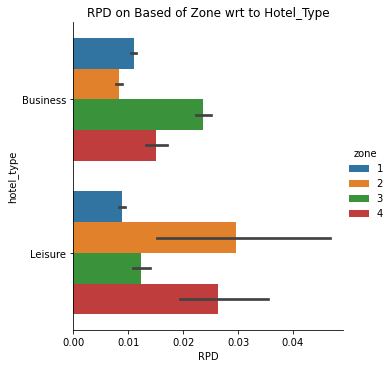

<Figure size 2160x720 with 0 Axes>

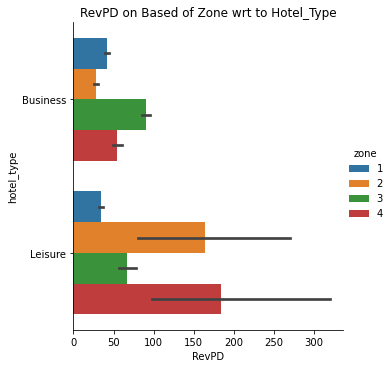

In [55]:
# create a bivariate plot for RPD and 'Hotel_type'  based on zone
plt.figure(figsize=(30, 10))
sns.catplot(hue='zone',y='hotel_type', x='RPD', data=df, kind='bar')
plt.title('RPD on Based of Zone wrt to Hotel_Type')
plt.show()
    
# create a bivariate plot for REVPD and Hotel_type'  based on zone
plt.figure(figsize=(30, 10))
sns.catplot(hue='zone',y='hotel_type', x='RevPD', data=df, kind='bar')
plt.title('RevPD on Based of Zone wrt to Hotel_Type')
plt.show()

<AxesSubplot:xlabel='hotel_type', ylabel='RevPD'>

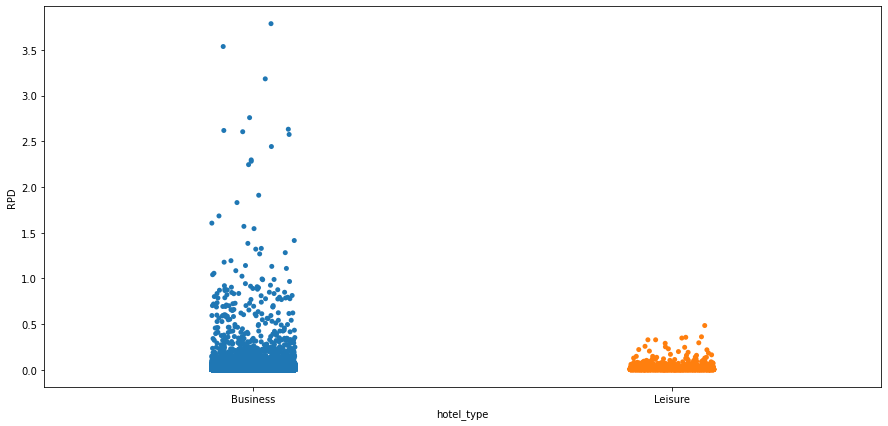

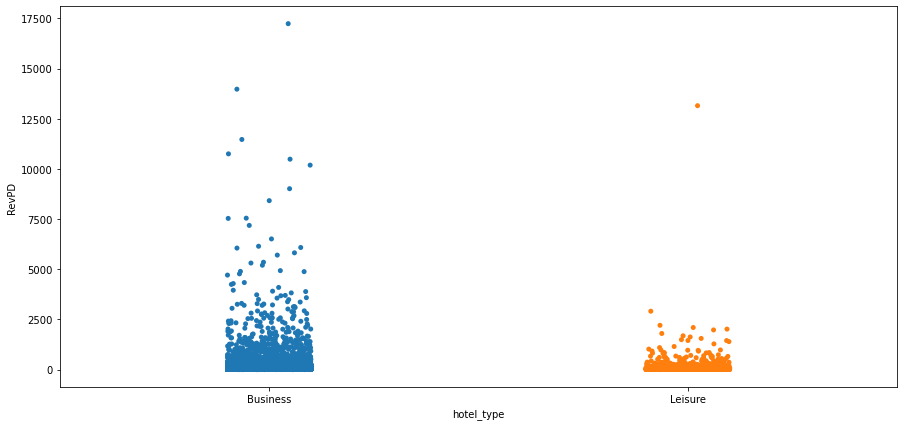

In [56]:
plt.figure(figsize=(15, 7))
sns.stripplot(y="RPD", x="hotel_type", data=df)

plt.figure(figsize=(15, 7))
sns.stripplot(y="RevPD", x="hotel_type", data=df)

<Figure size 1080x360 with 0 Axes>

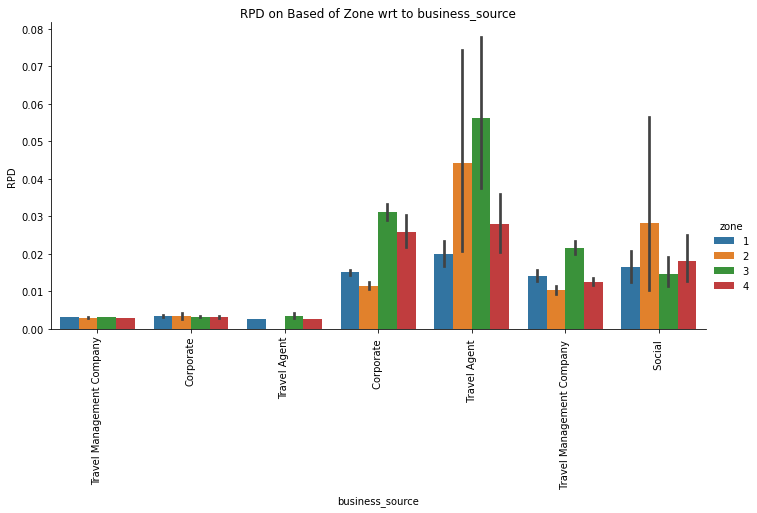

<Figure size 1080x360 with 0 Axes>

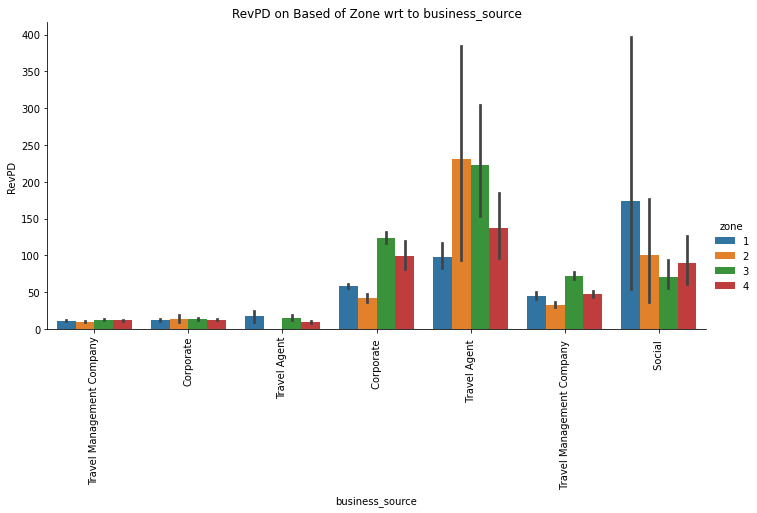

In [57]:
# create a bivariate plot for RPD and 'business_source'  based on zone
plt.figure(figsize=(15, 5))
sns.catplot(hue='zone',x='business_source', y='RPD', data=df, kind='bar', height=5, aspect=2)
plt.title('RPD on Based of Zone wrt to business_source')
plt.xticks(rotation=90)
plt.show()
    
# create a bivariate plot for REVPD and business_source'  based on zone
plt.figure(figsize=(15, 5))
sns.catplot(hue='zone',x='business_source', y='RevPD', data=df, kind='bar', height=5, aspect=2)
plt.title('RevPD on Based of Zone wrt to business_source')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x360 with 0 Axes>

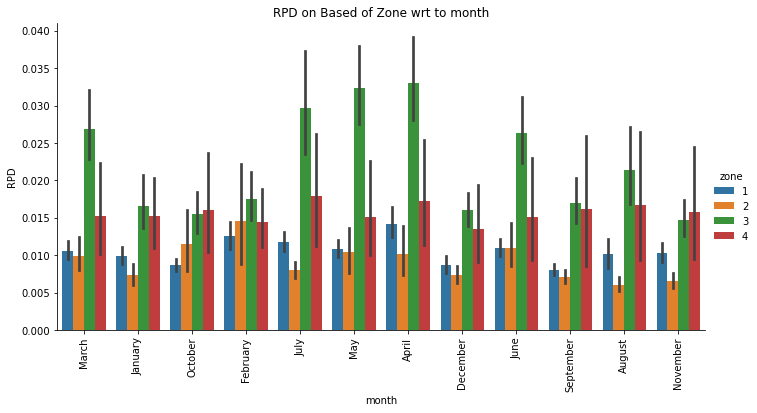

<Figure size 1080x360 with 0 Axes>

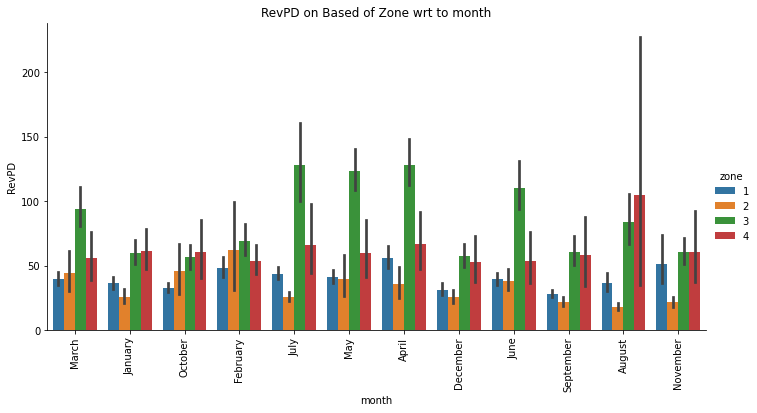

In [58]:
# create a bivariate plot for RPD and 'month' based on zone
plt.figure(figsize=(15, 5))
sns.catplot(hue='zone', x='month', y='RPD', data=df, kind='bar', height=5, aspect=2)
plt.title('RPD on Based of Zone wrt to month')
plt.xticks(rotation=90)
plt.show()

# create a bivariate plot for REVPD and month' based on zone
plt.figure(figsize=(15, 5))
sns.catplot(hue='zone', x='month', y='RevPD', data=df, kind='bar', height=5, aspect=2)
plt.title('RevPD on Based of Zone wrt to month')
plt.xticks(rotation=90)
plt.show()

## No. of transaction – countplots for each of the classes

Text(-9.075000000000003, 0.5, 'Count')

<Figure size 1080x360 with 0 Axes>

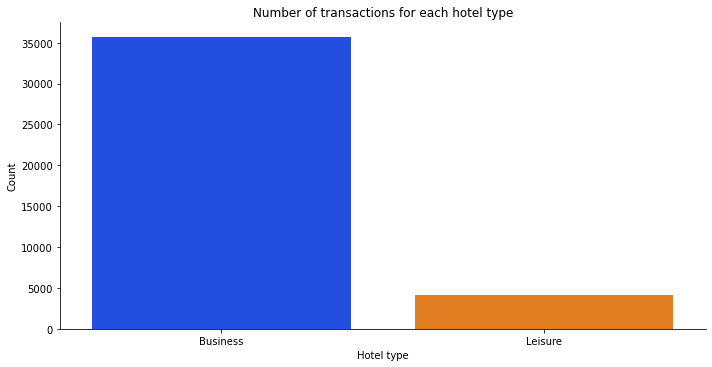

In [59]:
# Create the catplot to find the transcaion value vs hotel_type 
plt.figure(figsize=(15, 5))
sns.catplot(x='hotel_type',kind='count', data=df, palette='bright', height=5, aspect=2)

# Set the title and axis labels
plt.title('Number of transactions for each hotel type')
plt.xlabel('Hotel type')
plt.ylabel('Count')

Text(27.908164062500006, 0.5, 'Count')

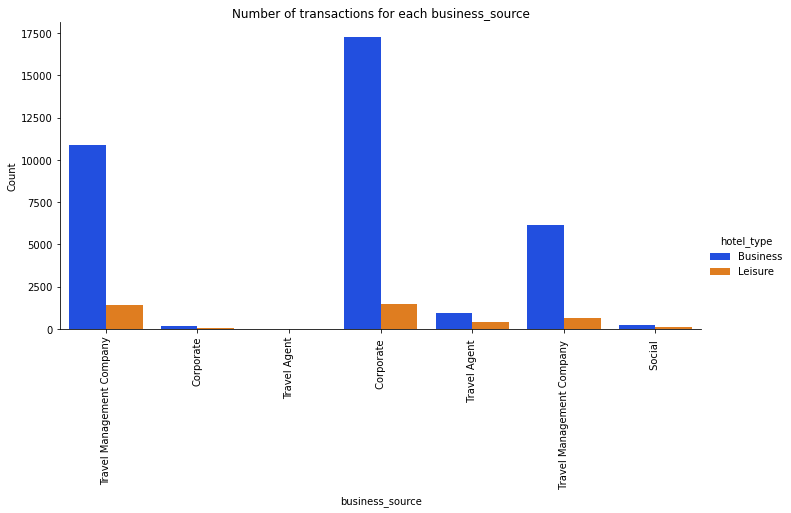

In [60]:
# Create the catplot to find the transcaion value vs business_soucre 
sns.catplot(x='business_source',kind='count',hue='hotel_type', data=df, palette='bright', height=5, aspect=2)

# Set the title and axis labels
plt.title('Number of transactions for each business_source')
plt.xlabel('business_source')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(27.908164062500006, 0.5, 'Count')

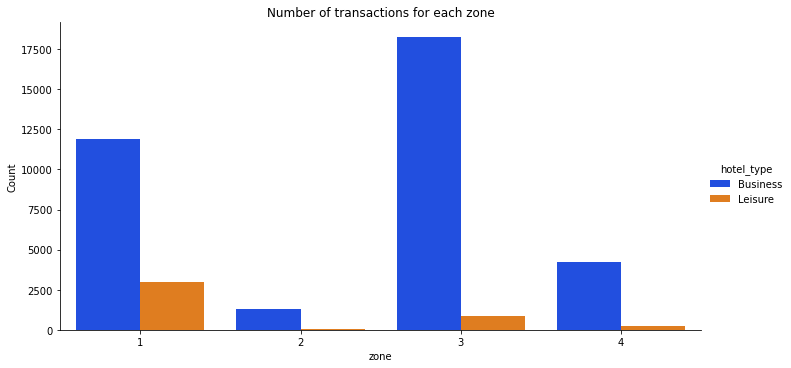

In [136]:
# Create the catplot to find the transcaion value vs zone 
sns.catplot(x='zone',kind='count',hue='hotel_type', data=df, palette='bright', height=5, aspect=2)

# Set the title and axis labels
plt.title('Number of transactions for each zone')
plt.xlabel('zone')
plt.xticks(rotation=0)
plt.ylabel('Count')

Text(27.19651041666667, 0.5, 'Count')

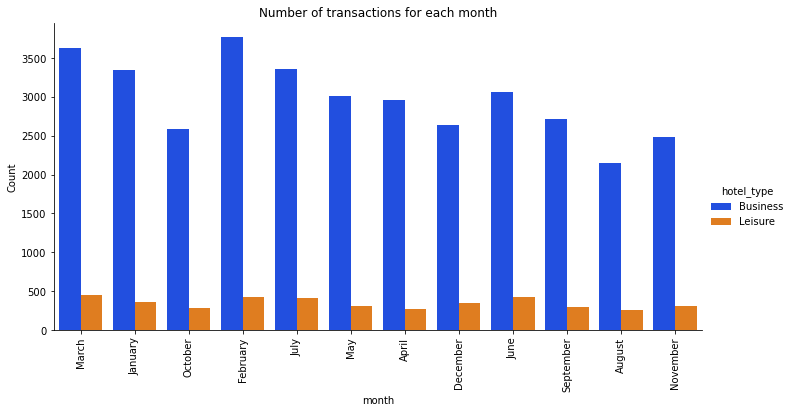

In [134]:
# Create the catplot to find the transcaion value vs month 
sns.catplot(x='month',kind='count',hue='hotel_type', data=df, palette='bright', height=5, aspect=2,estimator=len)

# Set the title and axis labels
plt.title('Number of transactions for each month')
plt.xlabel('month')
plt.xticks(rotation=90)
plt.ylabel('Count')


Text(27.908164062500006, 0.5, 'Count')

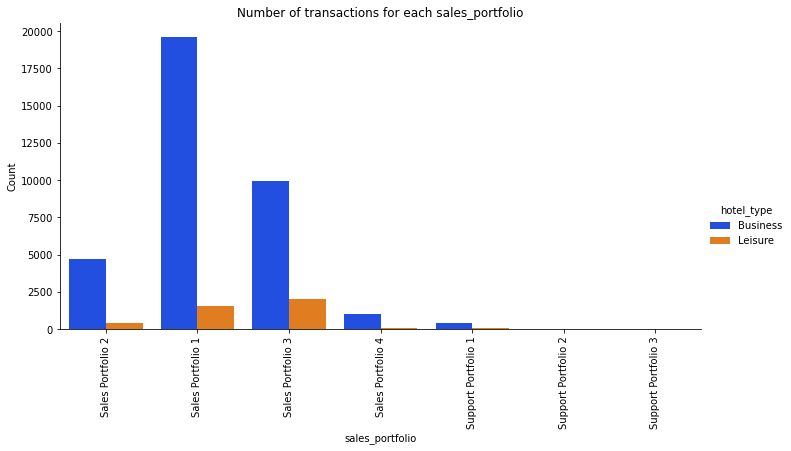

In [63]:
# Create the catplot to find the transcaion value vs sales_portfolio 
sns.catplot(x='sales_portfolio',kind='count',hue='hotel_type', data=df, palette='bright', height=5, aspect=2)

# Set the title and axis labels
plt.title('Number of transactions for each sales_portfolio')
plt.xlabel('sales_portfolio')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Yearwise Top 10 account_name based on RPD and REVPD

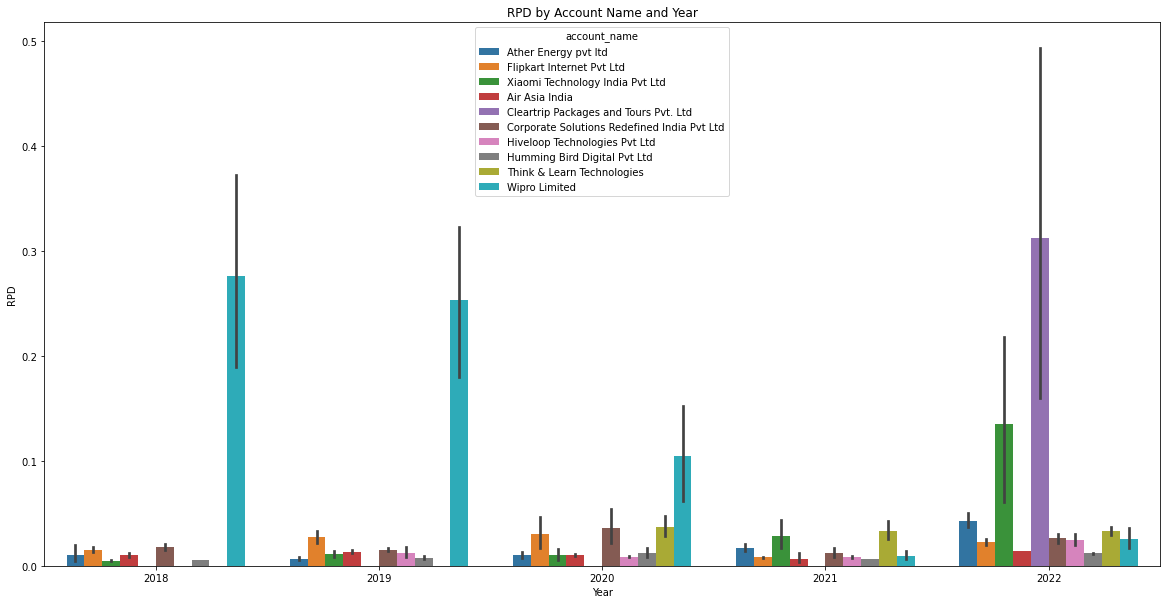

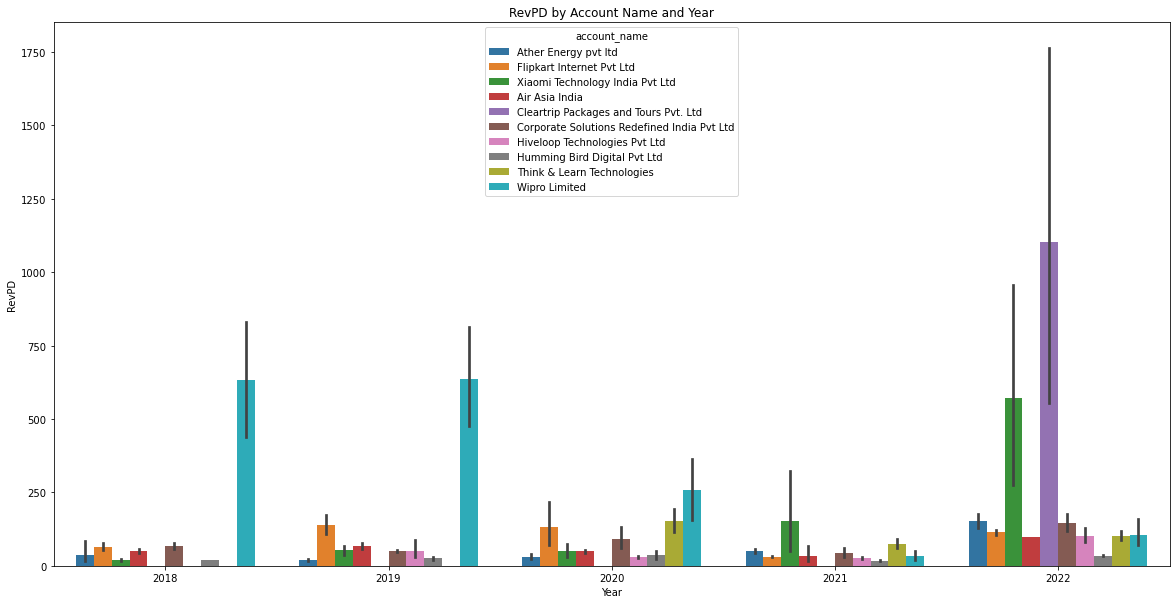

In [137]:
subset_df = df[['account_name', 'year', 'RPD', 'RevPD']]
sorted_df = subset_df.sort_values(by='RPD', ascending=False)

# get the top 10 account names by RPD
top10_account_RPD = sorted_df.groupby('account_name')['RPD'].sum().sort_values(ascending=False).head(10)

# create a barplot for RPD by account_name and year
plt.figure(figsize=(20, 10))
sns.barplot(x='year', y='RPD', hue='account_name', data=subset_df[subset_df['account_name'].isin(top10_account_RPD.index)])
plt.title('RPD by Account Name and Year')
plt.xlabel('Year')
plt.ylabel('RPD')
plt.show()

# sort the data by RevPD in descending order
sorted_df = subset_df.sort_values(by='RevPD', ascending=False)

# get the top 10 account names by RevPD
top10_account_RevPD = sorted_df.groupby('account_name')['RevPD'].sum().sort_values(ascending=False).head(10)

# create a barplot for RevPD by account_name and year
plt.figure(figsize=(20, 10))
sns.barplot(x='year', y='RevPD', hue='account_name', data=subset_df[subset_df['account_name'].isin(top10_account_RevPD.index)])
plt.title('RevPD by Account Name and Year')
plt.xlabel('Year')
plt.ylabel('RevPD')
plt.show()

## Multivariate Analysis

### Identify intervariable dependencies based on heatmap


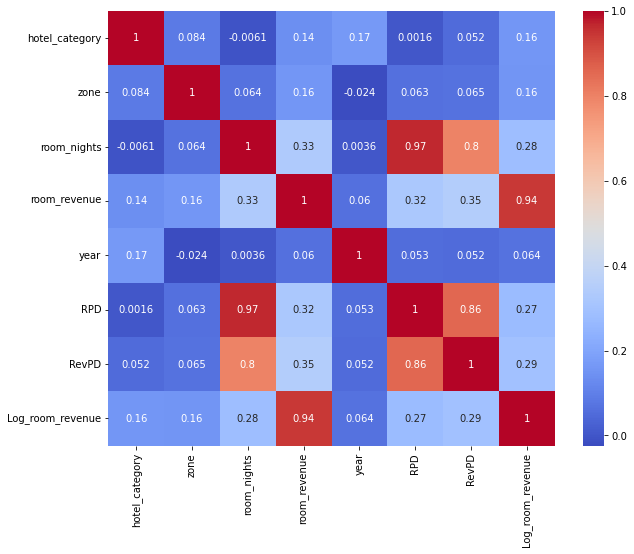

In [65]:
# create a correlation matrix for the variables in df
corr_matrix = df.corr()

# create a heatmap for the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Q1. What is the correct order of decreasing productivity (Room Nights) of this sales office? 

In [66]:
# group the data by year and sum up the room nights then sort in asecending for each year
room_nights_by_sorted_year = df.groupby('year')['room_nights'].sum().sort_values(ascending=False).index


print(room_nights_by_sorted_year)


Int64Index([2019, 2018, 2022, 2021, 2020], dtype='int64', name='year')


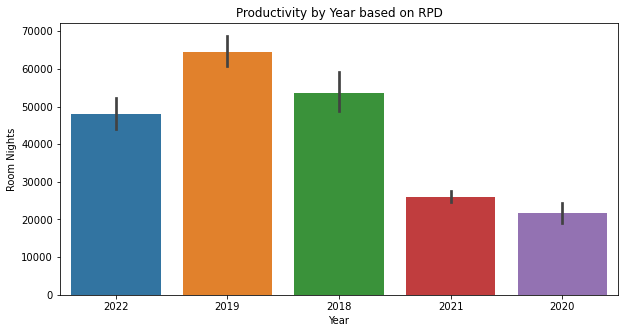

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='room_nights', data=df, estimator=sum, order=df.groupby(['year'])['RPD'].sum().sort_values(ascending=False).index)
plt.title('Productivity by Year based on RPD')
plt.xlabel('Year')
plt.ylabel('Room Nights')
plt.show()

### Q3 In order to prepare the strategy for next year, the Sales Manager needs to understand the hotel names where the productivity has degrown as compared to the next best year (2019). This will help him prepare an action plan for performance improvement. He will need the top 3 hotels that have shown the highest degrowth % in 2022 as compared to that in 2019:

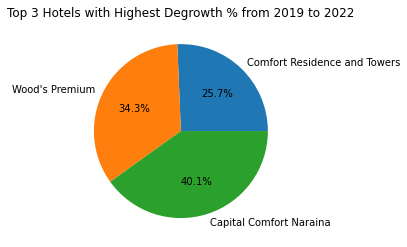

In [68]:
# Calculate percentage change in RPD for each hotel from 2019 to 2022
hotel_growth = df[df['year'].isin([2019, 2022])].pivot_table(index='hotel_name', columns='year', values='RPD', aggfunc='mean')
hotel_growth['growth_pct'] = abs(hotel_growth[2022] - hotel_growth[2019]) / hotel_growth[2019] * 100

# Select top 3 hotels with highest degrowth % in 2022 compared to 2019
worst_hotels = hotel_growth.sort_values('growth_pct').head(3)

# Create pie chart
plt.pie(worst_hotels['growth_pct'], labels=worst_hotels.index, autopct='%1.1f%%')
plt.title('Top 3 Hotels with Highest Degrowth % from 2019 to 2022')
plt.show()

### Q4. Sale Manager wants to assess further opportunities of improvement and hence wants to know the business sources that have degrown in 2022 as compared to that of 2019.

year                              2018       2019       2020       2021  \
business_source                                                           
 Social                       2.123288   2.117808   0.273973   0.427397   
 Travel Management Company   24.671233  38.608219  15.887671  13.772603   
Travel Management Company     9.879452  10.471233   2.709589   5.230137   

year                              2022  pct_change  
business_source                                     
 Social                       0.811321  -61.690547  
 Travel Management Company   26.834906  -30.494319  
Travel Management Company     9.367925  -10.536566  


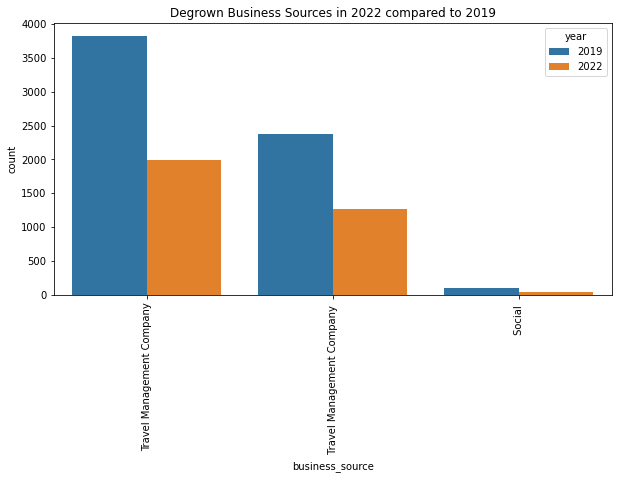

In [77]:
# create a pivot table to calculate the total RPD for each business source in 2019 and 2022
pivot_table = df.pivot_table(index=['business_source'], columns=['year'], values='RPD', aggfunc='sum')

# calculate the percentage change between 2019 and 2022
pivot_table['pct_change'] = (pivot_table[2022] - pivot_table[2019]) / pivot_table[2019] * 100

# sort the values by percentage change
pivot_table.sort_values(by='pct_change', inplace=True)

# filter the sources with negative percentage change (i.e. degrown)
degrown_sources = pivot_table[pivot_table['pct_change'] < 0]

# display the top 10 degrown sources
print(degrown_sources.head(10))

plt.figure(figsize=(10, 5))
sns.countplot(x='business_source', hue='year', data=df[df['year'].isin([2019, 2022]) & df['business_source'].isin(degrown_sources.index)])
plt.xticks(rotation=90)
plt.title('Degrown Business Sources in 2022 compared to 2019')
plt.show()

### Q5 Historically, the travel agents have produced for leisure destinations more then as compared to that of business destinations. However, sales manager has a hunch that that this source market is not able to produce sufficiently for leisure destinations and has instead got more inclined towards travel to business destinations post pandemic drastically changing business dynamics. You check the data to conclude inference and found the hunch of sales manager to be true. Leisure contribution of total travel agent business has dipped from ____% in 2018 to ___% in 2022

In [78]:
# filter the data for travel agents
travel_agents = df[df['business_source'] == 'Travel Agent']

# create a pivot table to calculate the total RPD for leisure and business destinations separately for each year
pivot_table = travel_agents.pivot_table(index=['year'], columns=['hotel_type'], values='RPD', aggfunc='sum')

# calculate the percentage of leisure RPD out of the total RPD for each year
pivot_table['leisure_pct'] = pivot_table['Leisure'] / (pivot_table['Leisure'] + pivot_table['Business']) * 100

# display the results for 2018 and 2022
print('Leisure contribution of total travel agent business in 2018: {:.2f}%'.format(pivot_table.loc[2018, 'leisure_pct']))
print('Leisure contribution of total travel agent business in 2022: {:.2f}%'.format(pivot_table.loc[2022, 'leisure_pct']))



Leisure contribution of total travel agent business in 2018: 33.33%
Leisure contribution of total travel agent business in 2022: 66.67%


### Q6. Managing Director of the company has decided to reward the best performance based on growth as compared to last year to the individual salespeople. 3 Salespeople from across the company shall be facilitated and awarded. At least two top performing salesperson’s data is required by Managing Director’s office. Final judgement is specifically based on performance on luxury hotels (Upper upscale)

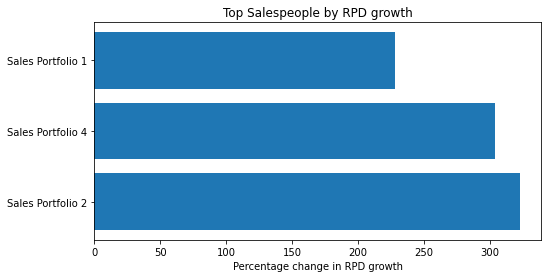

year,2021,2022,pct_change
sales_portfolio,,,
Sales Portfolio 2,11.827397,49.966981,322.468105
Sales Portfolio 4,1.873973,7.566038,303.743242
Sales Portfolio 1,43.668493,143.061321,227.607642


In [104]:
# subset the data for luxury hotels or the past two years
luxury_data = df[(df['hotel_category'] == '4') | (df['year'].isin([2021, 2022]))]

# create a pivot table to calculate the total RPD for each salesperson in both years
salesperson_pivot1 = luxury_data.pivot_table(index='sales_portfolio', columns='year', values='RPD', aggfunc='sum')

# calculate the percentage change between 2021 and 2022 for each salesperson
salesperson_pivot1['pct_change'] = (salesperson_pivot[2022] - salesperson_pivot[2021]) / salesperson_pivot[2021] * 100

# sort the values by percentage change in descending order
salesperson_pivot1.sort_values(by='pct_change', ascending=False, inplace=True)

# select the top three salespeople with the highest percentage change in RPD growth
top_salespeople = salesperson_pivot1.head(3)

# display the top salespeople
a=top_salespeople

# plot the top salespeople
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(top_salespeople.index, top_salespeople['pct_change'])
ax.set_xlabel('Percentage change in RPD growth')
ax.set_title('Top Salespeople by RPD growth')
plt.show()

a.head()

### Q7. From one of the previous questions, it is now known that the Sales Office is struggling to perform for leisure destinations. The easiest way to prepare the strategy is initially to look at what used to support the office with business in the past and has ceased to perform/ drastically be decreased in performance. Check the top 2 accounts that have shown drastic degrowth over 2019 (Since 2019 was the next best year of performance) and for which of the hotels (Top 2)


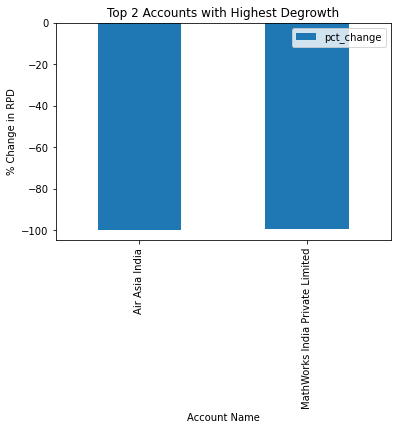

year,2019,2022,pct_change
account_name,,,
Air Asia India,9.838356,0.014151,-99.856166
MathWorks India Private Limited,0.967123,0.004717,-99.512267


In [125]:
# subset the data for 2019 and 2022
data_2019_2022 = df[df['year'].isin([2019, 2022])]

# create a pivot table to calculate the total RPD for each account in both years
account_pivot = data_2019_2022.pivot_table(index='account_name', columns='year', values='RPD', aggfunc='sum')

# calculate the percentage change between 2019 and 2022 for each account
account_pivot['pct_change'] = (account_pivot[2022] - account_pivot[2019]) / account_pivot[2019] * 100

# sort the values by percentage change in ascending order
account_pivot.sort_values(by='pct_change', inplace=True)

# select the top 2 accounts with the lowest percentage change in RPD growth (i.e. highest degrowth)
top_accounts = account_pivot.head(2)

# display the top accounts
top_accounts

#  create bar plot
top_accounts.plot.bar(y='pct_change')
plt.title('Top 2 Accounts with Highest Degrowth')
plt.xlabel('Account Name')
plt.ylabel('% Change in RPD')
plt.show()
top_accounts

In [127]:
# subset the data for the top 2 accounts and the luxury hotels or the past two years
top_accounts_data = data_2019_2022[data_2019_2022['account_name'].isin(top_accounts.index) & ((data_2019_2022['hotel_category'] == '4') | (data_2019_2022['year'].isin([2019, 2022])))]

# create a pivot table to calculate the total RPD for each hotel in both years and for the top 2 accounts
hotel_pivot = top_accounts_data.pivot_table(index='hotel_name', columns=['account_name', 'year'], values='RPD', aggfunc='sum')

# calculate the percentage change between 2019 and 2022 for each hotel and account
hotel_pivot['pct_change'] = (hotel_pivot[('Air Asia India', 2022)] - hotel_pivot[('Air Asia India', 2019)] + hotel_pivot[('MathWorks India Private Limited', 2022)] - hotel_pivot[('MathWorks India Private Limited', 2019)]) / (hotel_pivot[('Air Asia India', 2019)] + hotel_pivot[('MathWorks India Private Limited', 2019)]) * 100

# sort the values by percentage change in descending order
hotel_pivot.sort_values(by='pct_change', ascending=False, inplace=True)

# select the top 2 hotels with the highest percentage change in RPD growth
top_hotels = hotel_pivot.head(2)

# display the top hotels

top_hotels



account_name    Air Asia India      MathWorks India Private Limited       \
year                      2019 2022                            2019 2022   
hotel_name                                                                 
 Premium Jaipur       0.032877  NaN                             NaN  NaN   
Airport Comfort       1.852055  NaN                             NaN  NaN   

account_name    pct_change  
year                        
hotel_name                  
 Premium Jaipur        NaN  
Airport Comfort        NaN

### Q1 Maximum Rooms Per Day (RPD) has been observed in year:


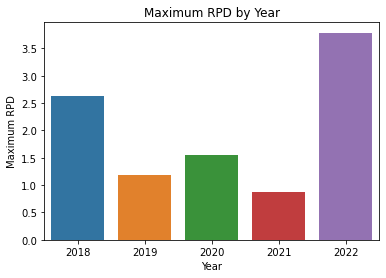

In [140]:
max_rpd = df.pivot_table(index='year', values='RPD', aggfunc='max')

# create bar plot
sns.barplot(x=max_rpd.index, y='RPD', data=max_rpd)
plt.title('Maximum RPD by Year')
plt.xlabel('Year')
plt.ylabel('Maximum RPD')
plt.show()

### Q2 Maximum productivity (Room Nights in 2022 have been achieved from which sales_portfolio

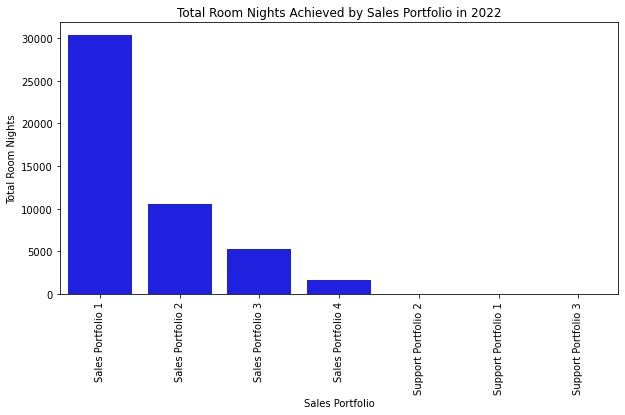

In [141]:
# Filter the data for 2022
df_2022 = df[df['year'] == 2022]

# Create a pivot table to calculate the total room nights for each sales portfolio
pivot_table = df_2022.pivot_table(index='sales_portfolio', values='room_nights', aggfunc='sum')

# Sort the values in descending order
pivot_table = pivot_table.sort_values(by='room_nights', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=pivot_table.index, y='room_nights', data=pivot_table, color='b')
plt.xticks(rotation=90)
plt.title('Total Room Nights Achieved by Sales Portfolio in 2022')
plt.xlabel('Sales Portfolio')
plt.ylabel('Total Room Nights')
plt.show()


### Q3 What is the absolute difference between mean of total productivity in year 2018 and 2022 (Upto 2 decimal places)


In [142]:
# filter the dataframe to include only 2018 and 2022 data
df_2018_2022 = df[df['year'].isin([2018, 2022])]

# group the data by year and calculate the mean of the 'room_nights' column
mean_room_nights = df_2018_2022.groupby('year')['room_nights'].mean()

# calculate the absolute difference between the means
abs_diff = abs(mean_room_nights.loc[2018] - mean_room_nights.loc[2022])

# print the result with 2 decimal places
print(round(abs_diff, 2))


0.88


### Q4 What is the segment mix of the office in percentage:
Hint: Segment mix is an industry specific term. It relates to the proportion of each of the segment’s contribution to total business volume. It is commonly calculated as percentage of total business.


In [143]:
segment_volume = df.groupby('sales_portfolio')['room_revenue'].sum()

# calculate the total business volume
total_volume = segment_volume.sum()

# calculate the percentage contribution of each segment to the total business volume
segment_mix = segment_volume / total_volume * 100

# print the segment mix
print(segment_mix)

sales_portfolio
Sales Portfolio 1      59.471222
Sales Portfolio 2      13.693931
Sales Portfolio 3      22.961102
Sales Portfolio 4       2.456277
Support Portfolio 1     1.307348
Support Portfolio 2     0.070253
Support Portfolio 3     0.039867
Name: room_revenue, dtype: float64


### Q5 What is the source mix of the office in percentage:
Hint: Source mix is an industry specific term. It relates to the proportion of each of the business segment’s contribution to total business volume. It is commonly calculated as percentage of total business.


In [144]:
source_mix = df.groupby('business_source')['room_revenue'].sum() / df['room_revenue'].sum() * 100
source_mix

business_source
 Corporate                     63.454544
 Social                         1.280816
 Travel Agent                   4.987228
 Travel Management Company     20.104341
Corporate                       0.183552
Travel Agent                    0.014947
Travel Management Company       9.974572
Name: room_revenue, dtype: float64

### Q6 Which zone has shown maximum degrowth in 2022 over previous year. 


In [145]:
# filter the data for years 2021 and 2022
df_21_22 = df[df['year'].isin([2021, 2022])]

# calculate the total Room Nights for each zone in 2021 and 2022
rn_by_zone = df_21_22.pivot_table(index='zone', columns='year', values='room_nights', aggfunc='sum')

# calculate the percentage change in Room Nights between 2022 and 2021
rn_by_zone['pct_change'] = (rn_by_zone[2022] - rn_by_zone[2021]) / rn_by_zone[2021] * 100

# sort the values by percentage change in descending order
rn_by_zone_sorted = rn_by_zone.sort_values(by='pct_change', ascending=False)

# get the zone with the highest negative percentage change
max_degrowth_zone = rn_by_zone_sorted.index[-1]

print(f"The zone with the maximum degrowth in 2022 over the previous year is {max_degrowth_zone}.")


The zone with the maximum degrowth in 2022 over the previous year is 2.


### Q7 Which Zone has shown the second to highest growth in 2022 over previous year. Check this in RPD terms.


In [146]:
# Group data by zone and year and calculate sum of RPD
zone_rpd = df.groupby(['zone', 'year'])['RPD'].sum().unstack()

# Calculate percentage change in RPD between 2022 and 2021
zone_rpd['pct_change'] = (zone_rpd[2022] - zone_rpd[2021]) / zone_rpd[2021] * 100

# Sort the zones by percentage change in descending order
zone_rpd.sort_values(by='pct_change', ascending=False, inplace=True)

# Get the zone with the second highest growth in 2022 over the previous year
second_highest = zone_rpd.index[1]

print("The zone with the second highest growth in 2022 over the previous year (in terms of RPD) is:", second_highest)


The zone with the second highest growth in 2022 over the previous year (in terms of RPD) is: 1


### Q8 When compared to pre-pandemic period, which Zone has shown maximum degrowth (Compare 2022 with 2019. Check this in RPD terms.

In [147]:
# Create a pivot table to calculate the total RPD by year and zone
rpd_pivot = pd.pivot_table(df, values='RPD', index='zone', columns='year', aggfunc='sum')

# Calculate the RPD growth from 2019 to 2022 for each zone
rpd_growth = (rpd_pivot[2022] - rpd_pivot[2019]) / rpd_pivot[2019] * 100

# Sort the RPD growth in descending order
rpd_growth = rpd_growth.sort_values(ascending=False)

# Print the RPD growth for each zone
print(rpd_growth)


zone
3    70.043808
2     7.965766
1   -12.529796
4   -70.854229
dtype: float64


### Q9 When compared to pre-pandemic period, which Zone has shown maximum growth (Compare 2022 with 2019. Check this in RPD terms.
 

In [149]:
# Filter data for 2019 and 2022
data_2019 = df[df['year'] == 2019]
data_2022 = df[df['year'] == 2022]

# Calculate RPD for 2019 and 2022 for each zone
rpd_2019 = data_2019.groupby('zone')['RPD'].mean()
rpd_2022 = data_2022.groupby('zone')['RPD'].mean()

# Calculate the percentage change in RPD for each zone
pct_change = (rpd_2022 - rpd_2019) / rpd_2019 * 100

# Find the zone with the highest percentage change
max_zone = pct_change.idxmax()

# Print the zone with the highest percentage change
print("Zone with the highest growth between 2019 and 2022 in RPD terms: Zone {}".format(max_zone))


Zone with the highest growth between 2019 and 2022 in RPD terms: Zone 3


### Q10 Which city has the maximum number of bookings made?


In [150]:
city_bookings = df.groupby('city')['hotel_name'].count().sort_values(ascending=False)
print(city_bookings.head(1))


city
Bengaluru    9227
Name: hotel_name, dtype: int64


### Q11 Which category of hotels are having the highest avg room revenue?


In [151]:
avg_room_revenue_by_category = df.groupby('hotel_category')['room_revenue'].mean()
print(avg_room_revenue_by_category)


hotel_category
1    11681.581792
2    11014.687840
3    12824.974029
4    19388.026860
Name: room_revenue, dtype: float64


### Q12 Which month the maximum number of bookings were made for 2022?


In [152]:
df_2022 = df[df['year'] == 2022]  # Filter data for year 2022
bookings_by_month = df_2022.groupby('month')['room_nights'].sum().reset_index()  
bookings_by_month_sorted = bookings_by_month.sort_values('room_nights', ascending=False)  
max_month_bookings = bookings_by_month_sorted.iloc[0]['month'] 

print("The month with the maximum number of bookings in 2022 is:", max_month_bookings)

The month with the maximum number of bookings in 2022 is: April


### Q13 Given the data: 12 12 13 14 15 11 10 12 12 15 17 18 12 12 14 Find the median of the data.

In [153]:
data = [12, 12, 13, 14, 15, 11, 10, 12, 12, 15, 17, 18, 12, 12, 14]
data_sorted = sorted(data)
n = len(data)
if n % 2 == 0:
    median = (data_sorted[n//2 - 1] + data_sorted[n//2])/2
else:
    median = data_sorted[n//2]
print("Median is:", median)


Median is: 12


### Q14 Given the data: 12 12 13 14 15 11 10 12 12 15 17 18 12 12 14 Find the mode of the data.


In [154]:
data = [12, 12, 13, 14, 15, 11, 10, 12, 12, 15, 17, 18, 12, 12, 14]
freq_dict = {}
for num in data:
    if num in freq_dict:
        freq_dict[num] += 1
    else:
        freq_dict[num] = 1


max_freq = max(freq_dict.values())
mode = [num for num, freq in freq_dict.items() if freq == max_freq]

print("Mode(s) of the data:", mode)


Mode(s) of the data: [12]
